# TP2 & 3: Segmentation des données et visualisation.

# **Partie** **A**

In [1]:
import pandas as pd #importation des bibliothèques
import numpy as np
import json

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data=open('/content/drive/MyDrive/notebook/ABR.json','r')
lines=data.readlines()
data.close()

In [4]:
df = pd.read_json('/content/drive/MyDrive/notebook/ABR.json',lines=True,nrows=50000) #lecture de données
df


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A10000012B7CGYKOMPQ4L,000100039X,Adam,"[0, 0]",Spiritually and mentally inspiring! A book tha...,5,Wonderful!,1355616000,"12 16, 2012"
1,A2S166WSCFIFP5,000100039X,"adead_poet@hotmail.com ""adead_poet@hotmail.com""","[0, 2]",This is one my must have books. It is a master...,5,close to god,1071100800,"12 11, 2003"
2,A1BM81XB4QHOA3,000100039X,"Ahoro Blethends ""Seriously""","[0, 0]",This book provides a reflection that you can a...,5,Must Read for Life Afficianados,1390003200,"01 18, 2014"
3,A1MOSTXNIO5MPJ,000100039X,Alan Krug,"[0, 0]",I first read THE PROPHET in college back in th...,5,Timeless for every good and bad time in your l...,1317081600,"09 27, 2011"
4,A2XQ5LZHTD4AFT,000100039X,Alaturka,"[7, 9]",A timeless classic. It is a very demanding an...,5,A Modern Rumi,1033948800,"10 7, 2002"
...,...,...,...,...,...,...,...,...,...
49995,A2R2VN5X77D66O,0028633873,Donna H.,"[0, 0]",i gave this as a gift so i don't know how good...,5,bought as a gift,1402704000,"06 14, 2014"
49996,A38UCPTYS6LBHE,0028633873,"Lindsay Harrison ""film and book aficionado""","[22, 23]","I have been attempting to learn Hebrew, but I ...",5,For the Jew or the Goy,1051488000,"04 28, 2003"
49997,A2UENE1PINAKCT,0028633873,Marian E. Wells,"[0, 0]",Wanted to know more about Yiddish and this boo...,5,YIDDISH for a Gentile?,1388620800,"01 2, 2014"
49998,ALA77HERW2U0J,0028633873,Michael Peterson,"[1, 3]",While searching for a book that explains the Y...,5,This Yiddish book is a Feast for the Senses,1198627200,"12 26, 2007"


In [5]:
def matrice_scores(df): #fonction pour la matrice des scores
    df1=df[['asin','overall']]
    S=df1['asin'].unique().size
    df0=df1['asin'].unique()
    col=df['asin'].unique()
    df3 = pd.DataFrame(columns=col,index=range(1,6))
    for i in df0:

        df2=df1[df1.asin==i]
        l=pd.value_counts(df2['overall'],sort=True,ascending=True)
        l.sort_index()
        df3[i]=l
    df3[np.isnan(df3)] = 0

    return df3

In [6]:
matrice_df=matrice_scores(df)
matrice_df

,000100039X,0001055178,0001473123,0001473727,0001473905,0001712772,000171287X,0001714538,0002005395,0002006715,...,0028631919,002863196X,002863201X,0028632028,0028632346,0028632613,0028632753,0028633504,0028633784,0028633873
1,6,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0
2,4,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,2.0,1.0,0.0,1,3.0,2.0,0.0,0.0
3,8,2.0,0.0,0.0,1.0,0.0,2.0,0.0,5.0,1.0,...,0.0,0.0,1.0,1.0,0.0,4,2.0,0.0,1.0,1.0
4,15,10.0,2.0,0.0,0.0,1.0,1.0,2.0,3.0,0.0,...,2.0,2.0,4.0,1.0,2.0,4,0.0,3.0,2.0,1.0
5,173,2.0,13.0,7.0,5.0,13.0,9.0,3.0,6.0,4.0,...,14.0,10.0,15.0,6.0,5.0,7,0.0,19.0,4.0,6.0


In [7]:
matrice_df.sum() #matrice des sommes des scores
sum= pd.DataFrame(matrice_df.sum()).T
sum

,000100039X,0001055178,0001473123,0001473727,0001473905,0001712772,000171287X,0001714538,0002005395,0002006715,...,0028631919,002863196X,002863201X,0028632028,0028632346,0028632613,0028632753,0028633504,0028633784,0028633873
0,206.0,18.0,16.0,7.0,6.0,15.0,12.0,7.0,14.0,5.0,...,18.0,13.0,22.0,9.0,7.0,18.0,5.0,24.0,7.0,8.0


In [8]:
#nombre de livres se trouvant dans dataset
df0=df[['asin','overall']]
df0

,asin,overall
0,000100039X,5
1,000100039X,5
2,000100039X,5
3,000100039X,5
4,000100039X,5
...,...,...
49995,0028633873,5
49996,0028633873,5
49997,0028633873,5
49998,0028633873,5


In [9]:
pdList = [matrice_df.iloc[:2].cumsum().iloc[1:2], matrice_df.iloc[2:3], matrice_df.iloc[3:5].cumsum().iloc[1:2],sum]  # Liste de la somme des lignes dataframes
Stat = pd.concat(pdList)
Stat

,000100039X,0001055178,0001473123,0001473727,0001473905,0001712772,000171287X,0001714538,0002005395,0002006715,...,0028631919,002863196X,002863201X,0028632028,0028632346,0028632613,0028632753,0028633504,0028633784,0028633873
2,10.0,4.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,...,2.0,1.0,2.0,1.0,0.0,3.0,3.0,2.0,0.0,0.0
3,8.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,5.0,1.0,...,0.0,0.0,1.0,1.0,0.0,4.0,2.0,0.0,1.0,1.0
5,188.0,12.0,15.0,7.0,5.0,14.0,10.0,5.0,9.0,4.0,...,16.0,12.0,19.0,7.0,7.0,11.0,0.0,22.0,6.0,7.0
0,206.0,18.0,16.0,7.0,6.0,15.0,12.0,7.0,14.0,5.0,...,18.0,13.0,22.0,9.0,7.0,18.0,5.0,24.0,7.0,8.0


In [10]:
Stat.rename(index = {2: 'Nbr Non Apprécié', 3 : 'Nbr Neutre', 5 : 'Nbr Apprécié', 0 : 'Nbr de votes'}, inplace = True) #modification des noms de lignes
Stat

,000100039X,0001055178,0001473123,0001473727,0001473905,0001712772,000171287X,0001714538,0002005395,0002006715,...,0028631919,002863196X,002863201X,0028632028,0028632346,0028632613,0028632753,0028633504,0028633784,0028633873
Nbr Non Apprécié,10.0,4.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,...,2.0,1.0,2.0,1.0,0.0,3.0,3.0,2.0,0.0,0.0
Nbr Neutre,8.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,5.0,1.0,...,0.0,0.0,1.0,1.0,0.0,4.0,2.0,0.0,1.0,1.0
Nbr Apprécié,188.0,12.0,15.0,7.0,5.0,14.0,10.0,5.0,9.0,4.0,...,16.0,12.0,19.0,7.0,7.0,11.0,0.0,22.0,6.0,7.0
Nbr de votes,206.0,18.0,16.0,7.0,6.0,15.0,12.0,7.0,14.0,5.0,...,18.0,13.0,22.0,9.0,7.0,18.0,5.0,24.0,7.0,8.0


In [11]:
dff=df0.groupby('asin').agg(['mean','std', 'median'])
dff

overall                 
                mean       std median
asin                                 
000100039X  4.674757  0.875712    5.0
0001055178  3.555556  0.983524    4.0
0001473123  4.625000  1.024695    5.0
0001473727  5.000000  0.000000    5.0
0001473905  4.666667  0.816497    5.0
...              ...       ...    ...
0028632613  3.722222  1.363626    4.0
0028632753  2.400000  0.547723    2.0
0028633504  4.625000  0.875388    5.0
0028633784  4.428571  0.786796    5.0
0028633873  4.625000  0.744024    5.0

[955 rows x 3 columns]

# QST1

La matrice de données X ∈ Rp×c avec c étant le nombre de
caractérisitques statistiques extraites.

c=8

p est nombre de livres

In [12]:
#moyenne,écart-type et médiane
Car_stat=pd.concat([Stat, dff.transpose()])
Car_stat=Car_stat.transpose() 
Car_statF=pd.DataFrame(data=Car_stat.values,index=Car_stat.index,columns=['Nbr_Non_Apprécié','Nbr_Neutre','Nbr_Apprécié','Nbr_de_votes','Moyenne','Écart_type','Médiane'])
Car_statF

,Nbr_Non_Apprécié,Nbr_Neutre,Nbr_Apprécié,Nbr_de_votes,Moyenne,Écart_type,Médiane
000100039X,10.0,8.0,188.0,206.0,4.674757,0.875712,5.0
0001055178,4.0,2.0,12.0,18.0,3.555556,0.983524,4.0
0001473123,1.0,0.0,15.0,16.0,4.625000,1.024695,5.0
0001473727,0.0,0.0,7.0,7.0,5.000000,0.000000,5.0
0001473905,0.0,1.0,5.0,6.0,4.666667,0.816497,5.0
...,...,...,...,...,...,...,...
0028632613,3.0,4.0,11.0,18.0,3.722222,1.363626,4.0
0028632753,3.0,2.0,0.0,5.0,2.400000,0.547723,2.0
0028633504,2.0,0.0,22.0,24.0,4.625000,0.875388,5.0
0028633784,0.0,1.0,6.0,7.0,4.428571,0.786796,5.0


In [13]:
#Identification des livres les mieux appréciés : Apprécié - Plus au moins Apprécié - Non apprécié (Classe réelle)
D= pd.DataFrame(Car_statF.T.iloc[4])
D=D.T
for j in D.columns:
    if D.iloc[0][j]>3.5:
            D.loc[-1,j]=2
    elif D.iloc[0][j]<2.5:
            D.loc[-1,j]=0  
    else:
            D.loc[-1,j]=1   
D.rename(index = {-1: 'Classe'},inplace = True)
D=D.transpose()
D


,Moyenne,Classe
000100039X,4.674757,2.0
0001055178,3.555556,2.0
0001473123,4.625000,2.0
0001473727,5.000000,2.0
0001473905,4.666667,2.0
...,...,...
0028632613,3.722222,2.0
0028632753,2.400000,0.0
0028633504,4.625000,2.0
0028633784,4.428571,2.0


In [14]:
T=pd.DataFrame(D.iloc[:,1])#les vrais clusters
T


,Classe
000100039X,2.0
0001055178,2.0
0001473123,2.0
0001473727,2.0
0001473905,2.0
...,...
0028632613,2.0
0028632753,0.0
0028633504,2.0
0028633784,2.0


In [15]:
T #   0: Non apprécié |2: apprécié |1: neutre

,Classe
000100039X,2.0
0001055178,2.0
0001473123,2.0
0001473727,2.0
0001473905,2.0
...,...
0028632613,2.0
0028632753,0.0
0028633504,2.0
0028633784,2.0


# QST2

On commence par choisir, au hasard, k centroïdes. Qui seront les centres des clusters de départ.

Boucle

On construit k clusters : Chaque point est dans le cluster du centroïde qui lui est le plus proche.
On calcule les nouveaux centroïdes : Pour chacun des clusters qu’on vient de former, on calcule la moyenne. Celle-ci devient le nouveau centroïde (n’est pas necessairement un point du jeu de donnée).
On recommence jusqu’à ce qu’à ce qu’il y ait convergence : La convergence correspond au fait que les centroïdes ne changent pas après une mise à jour.

In [16]:
from sklearn.cluster import KMeans #importation de l'algo
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:
Car_stat.info()#s'assurer des Dtype

<class 'pandas.core.frame.DataFrame'>
Index: 955 entries, 000100039X to 0028633873
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nbr Non Apprécié   955 non-null    float64
 1   Nbr Neutre         955 non-null    float64
 2   Nbr Apprécié       955 non-null    float64
 3   Nbr de votes       955 non-null    float64
 4   (overall, mean)    955 non-null    float64
 5   (overall, std)     955 non-null    float64
 6   (overall, median)  955 non-null    float64
dtypes: float64(7)
memory usage: 92.0+ KB


[[2.30793991e+00 2.84656652e+00 2.09796137e+01 2.61341202e+01
  4.25439342e+00 9.13295499e-01]
 [3.87000000e+02 3.29800000e+02 2.35620000e+03 3.07300000e+03
  4.14675880e+00 1.08470192e+00]
 [6.08333333e+01 6.36666667e+01 4.46500000e+02 5.71000000e+02
  4.21105818e+00 1.02787094e+00]]


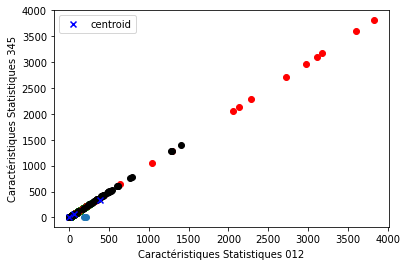

In [18]:
plt.scatter(Car_statF.iloc[0:3],Car_statF.iloc[3:6])
plt.xlabel('Caractéristiques Statistiques 012')
plt.ylabel('Caractéristiques Statistiques 345')
plt.legend()
km = KMeans(n_clusters=3)
y_predicted_eu = km.fit_predict(Car_statF[['Nbr_Non_Apprécié','Nbr_Neutre','Nbr_Apprécié','Nbr_de_votes','Moyenne','Écart_type']]) #apprentissage  grâce à la méthode fit()
#y_predicted_eu
Car_statF['Cluster_eu_Car']=y_predicted_eu  #ajout d'une colonne définissant le cluster
Car_statF
df1 = Car_statF[Car_statF.Cluster_eu_Car==0] #plot des differents clusters
df2 = Car_statF[Car_statF.Cluster_eu_Car==1]
df3 = Car_statF[Car_statF.Cluster_eu_Car==2]
print(km.cluster_centers_)
plt.scatter(df1,df1,color='green')
plt.scatter(df2,df2,color='red')
plt.scatter(df3,df3,color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='blue',marker='x',label='centroid')
plt.legend()


In [19]:
Car_statF #visualisation de mes clusters

,Nbr_Non_Apprécié,Nbr_Neutre,Nbr_Apprécié,Nbr_de_votes,Moyenne,Écart_type,Médiane,Cluster_eu_Car
000100039X,10.0,8.0,188.0,206.0,4.674757,0.875712,5.0,0
0001055178,4.0,2.0,12.0,18.0,3.555556,0.983524,4.0,0
0001473123,1.0,0.0,15.0,16.0,4.625000,1.024695,5.0,0
0001473727,0.0,0.0,7.0,7.0,5.000000,0.000000,5.0,0
0001473905,0.0,1.0,5.0,6.0,4.666667,0.816497,5.0,0
...,...,...,...,...,...,...,...,...
0028632613,3.0,4.0,11.0,18.0,3.722222,1.363626,4.0,0
0028632753,3.0,2.0,0.0,5.0,2.400000,0.547723,2.0,0
0028633504,2.0,0.0,22.0,24.0,4.625000,0.875388,5.0,0
0028633784,0.0,1.0,6.0,7.0,4.428571,0.786796,5.0,0


Text(0, 0.5, 'Nbr_Non_Apprécié')

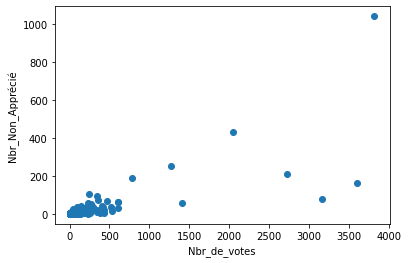

In [20]:
plt.scatter(Car_statF['Nbr_de_votes'],Car_statF['Nbr_Non_Apprécié'])
plt.xlabel('Nbr_de_votes')
plt.ylabel('Nbr_Non_Apprécié')

In [21]:
km = KMeans(n_clusters=3) #application de KMeans
y_predicted_eu = km.fit_predict(Car_statF[['Nbr_de_votes','Nbr_Non_Apprécié']]) #apprentissage  grâce à la méthode fit()
y_predicted_eu

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [22]:
Car_statF['Cluster_eu_2d']=y_predicted_eu  #ajout d'une colonne définissant le cluster
Car_statF

,Nbr_Non_Apprécié,Nbr_Neutre,Nbr_Apprécié,Nbr_de_votes,Moyenne,Écart_type,Médiane,Cluster_eu_Car,Cluster_eu_2d
000100039X,10.0,8.0,188.0,206.0,4.674757,0.875712,5.0,0,0
0001055178,4.0,2.0,12.0,18.0,3.555556,0.983524,4.0,0,0
0001473123,1.0,0.0,15.0,16.0,4.625000,1.024695,5.0,0,0
0001473727,0.0,0.0,7.0,7.0,5.000000,0.000000,5.0,0,0
0001473905,0.0,1.0,5.0,6.0,4.666667,0.816497,5.0,0,0
...,...,...,...,...,...,...,...,...,...
0028632613,3.0,4.0,11.0,18.0,3.722222,1.363626,4.0,0,0
0028632753,3.0,2.0,0.0,5.0,2.400000,0.547723,2.0,0,0
0028633504,2.0,0.0,22.0,24.0,4.625000,0.875388,5.0,0,0
0028633784,0.0,1.0,6.0,7.0,4.428571,0.786796,5.0,0,0


In [23]:
km.cluster_centers_#les paramètres du modèle dont les centroïdes finaux

array([[2.61341202e+01, 2.30793991e+00],
       [3.07300000e+03, 3.87000000e+02],
       [5.71000000e+02, 6.08333333e+01]])

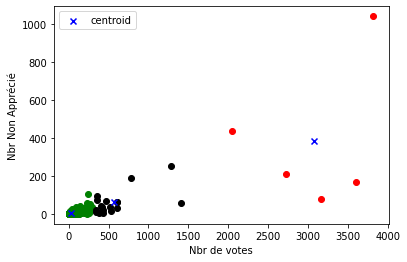

In [24]:
df1 = Car_statF[Car_statF.Cluster_eu_2d==0] #plot des differents clusters
df2 = Car_statF[Car_statF.Cluster_eu_2d==1]
df3 = Car_statF[Car_statF.Cluster_eu_2d==2]

plt.scatter(df1['Nbr_de_votes'],df1['Nbr_Non_Apprécié'],color='green')
plt.scatter(df2['Nbr_de_votes'],df2['Nbr_Non_Apprécié'],color='red')
plt.scatter(df3['Nbr_de_votes'],df3['Nbr_Non_Apprécié'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='blue',marker='x',label='centroid')
plt.xlabel('Nbr de votes')
plt.ylabel('Nbr Non Apprécié')
plt.legend()

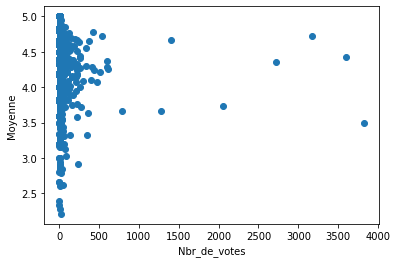

[[  25.84425349    4.25457232]
 [3073.            4.1467588 ]
 [ 556.52631579    4.2045729 ]]


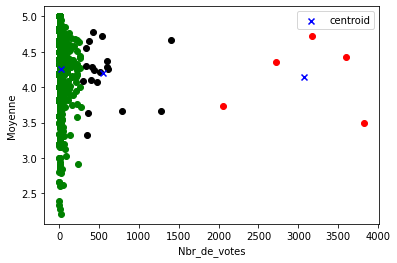

In [25]:
km = KMeans(n_clusters=3)
y_predicted_eu = km.fit_predict(Car_statF[['Nbr_de_votes','Moyenne']])
Car_statF['Cluster_eu']=y_predicted_eu

plt.scatter(Car_statF['Nbr_de_votes'],Car_statF['Moyenne'])
plt.xlabel('Nbr_de_votes')
plt.ylabel('Moyenne')
plt.show()
print(km.cluster_centers_)
df1 = Car_statF[Car_statF.Cluster_eu==0] #plot des differents clusters
df2 = Car_statF[Car_statF.Cluster_eu==1]
df3 = Car_statF[Car_statF.Cluster_eu==2]

plt.scatter(df1['Nbr_de_votes'],df1['Moyenne'],color='green')
plt.scatter(df2['Nbr_de_votes'],df2['Moyenne'],color='red')
plt.scatter(df3['Nbr_de_votes'],df3['Moyenne'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='blue',marker='x',label='centroid')
plt.xlabel('Nbr_de_votes')
plt.ylabel('Moyenne')
plt.legend()


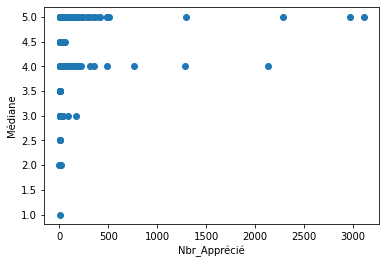

[[  21.35331906    4.53640257]
 [2624.            4.75      ]
 [ 525.35294118    4.70588235]]


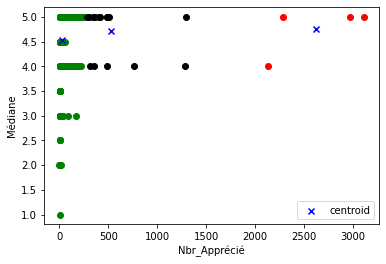

In [26]:
km = KMeans(n_clusters=3)
y_predicted_eu = km.fit_predict(Car_statF[['Nbr_Apprécié','Médiane']])
Car_statF['Cluster_eu']=y_predicted_eu

plt.scatter(Car_statF['Nbr_Apprécié'],Car_statF['Médiane'])
plt.xlabel('Nbr_Apprécié')
plt.ylabel('Médiane')
plt.show()
print(km.cluster_centers_)
df1 = Car_statF[Car_statF.Cluster_eu==0] #plot des differents clusters
df2 = Car_statF[Car_statF.Cluster_eu==1]
df3 = Car_statF[Car_statF.Cluster_eu==2]
plt.scatter(df1['Nbr_Apprécié'],df1['Médiane'],color='green')
plt.scatter(df2['Nbr_Apprécié'],df2['Médiane'],color='red')
plt.scatter(df3['Nbr_Apprécié'],df3['Médiane'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='blue',marker='x',label='centroid')
plt.xlabel('Nbr_Apprécié')
plt.ylabel('Médiane')
plt.legend()

In [27]:
Car_statF #visualisation des sous 3 dataframes representant chacune un cluster
print(df1.iloc[:,7])
print(df2.iloc[:,7])
df3.iloc[:,7]

000100039X    0
0001055178    0
0001473123    0
0001473727    0
0001473905    0
             ..
0028632613    0
0028632753    0
0028633504    0
0028633784    0
0028633873    0
Name: Cluster_eu_Car, Length: 934, dtype: int32
0002007770    1
0007386648    1
0007442920    1
0007444117    1
Name: Cluster_eu_Car, dtype: int32


0002247399    1
0006476155    2
0006514006    2
0006551807    2
0007124015    2
0007136838    2
0007167040    2
0007172826    2
0007205236    2
0007230206    2
0007281447    2
0007327064    2
0007410956    2
0007447868    2
0020519109    2
0025853503    2
0026009102    2
Name: Cluster_eu_Car, dtype: int32

**Clusetring - Observation**

on observe que le deuxieme choix de dimensions est meilleur que le premier : il permet d'inclure nos points dans 3 clusters differents non chevauchés

Précedemment k-Means utilise par défaut la distance euclienne. 
Par la suite on utilisera la similarité de cosine tq : cosinedistance( X, Y ) = 1 - X . Y = Euclidean distance |X - Y|^2 / 2

In [28]:
Car_statF.T.iloc[0:7].T

,Nbr_Non_Apprécié,Nbr_Neutre,Nbr_Apprécié,Nbr_de_votes,Moyenne,Écart_type,Médiane
000100039X,10.0,8.0,188.0,206.0,4.674757,0.875712,5.0
0001055178,4.0,2.0,12.0,18.0,3.555556,0.983524,4.0
0001473123,1.0,0.0,15.0,16.0,4.625000,1.024695,5.0
0001473727,0.0,0.0,7.0,7.0,5.000000,0.000000,5.0
0001473905,0.0,1.0,5.0,6.0,4.666667,0.816497,5.0
...,...,...,...,...,...,...,...
0028632613,3.0,4.0,11.0,18.0,3.722222,1.363626,4.0
0028632753,3.0,2.0,0.0,5.0,2.400000,0.547723,2.0
0028633504,2.0,0.0,22.0,24.0,4.625000,0.875388,5.0
0028633784,0.0,1.0,6.0,7.0,4.428571,0.786796,5.0


In [29]:
from sklearn.metrics.pairwise import cosine_similarity #matrice de similarité de cosinus
similarity_matrix = cosine_similarity(Car_statF.T.iloc[0:7].T)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7,8,9,...,945,946,947,948,949,950,951,952,953,954
0,1.000000,0.953382,0.960727,0.826020,0.763804,0.954758,0.921034,0.831921,0.910293,0.697518,...,0.967331,0.940599,0.978499,0.870416,0.832924,0.939450,0.566980,0.982620,0.820325,0.852198
1,0.953382,1.000000,0.973181,0.895221,0.871368,0.972541,0.965574,0.940466,0.963296,0.825946,...,0.982206,0.969839,0.985109,0.953092,0.901042,0.994066,0.780309,0.977481,0.907503,0.925676
2,0.960727,0.973181,1.000000,0.947133,0.907375,0.999774,0.984940,0.942467,0.946283,0.862542,...,0.998528,0.997759,0.995536,0.967469,0.952399,0.959684,0.656123,0.995158,0.941953,0.959730
3,0.826020,0.895221,0.947133,1.000000,0.984779,0.953079,0.966938,0.959043,0.903740,0.967375,...,0.933760,0.965018,0.918062,0.980244,0.998948,0.886661,0.675853,0.912704,0.991240,0.992151
4,0.763804,0.871368,0.907375,0.984779,1.000000,0.915604,0.952465,0.961218,0.906842,0.995185,...,0.893878,0.931900,0.876928,0.978031,0.985921,0.876905,0.739705,0.863996,0.995538,0.988482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,0.939450,0.994066,0.959684,0.886661,0.876905,0.959353,0.967915,0.930721,0.983378,0.834699,...,0.967829,0.957122,0.973903,0.951788,0.892888,1.000000,0.802929,0.962179,0.910219,0.926337
951,0.566980,0.780309,0.656123,0.675853,0.739705,0.663945,0.717956,0.807254,0.774020,0.742199,...,0.674322,0.679831,0.670974,0.769877,0.676717,0.802929,1.000000,0.638626,0.731077,0.722097
952,0.982620,0.977481,0.995158,0.912704,0.863996,0.992987,0.969791,0.915444,0.939623,0.811248,...,0.997285,0.986912,0.998775,0.942517,0.918405,0.962179,0.638626,1.000000,0.906534,0.929423
953,0.820325,0.907503,0.941953,0.991240,0.995538,0.948339,0.976028,0.969776,0.933028,0.981743,...,0.930707,0.960719,0.917239,0.991150,0.993469,0.910219,0.731077,0.906534,1.000000,0.998192


In [30]:
from scipy.cluster.hierarchy import linkage# a supp
Z = linkage(similarity_matrix, 'ward')
print(Z)
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2',
                         'Distance', 'Cluster Size'], dtype='object')

[[   3.           43.            0.            2.        ]
 [   4.          202.            0.            2.        ]
 [ 324.          742.            0.            2.        ]
 ...
 [1901.         1903.           23.74253402  267.        ]
 [1905.         1906.           45.52147895  653.        ]
 [1904.         1907.           63.76619718  955.        ]]


,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,3.0,43.0,0.0,2.0
1,4.0,202.0,0.0,2.0
2,324.0,742.0,0.0,2.0
3,744.0,748.0,0.0,2.0
4,256.0,431.0,0.0,2.0
...,...,...,...,...
949,1899.0,1902.0,17.125828,302.0
950,1892.0,1900.0,20.018598,386.0
951,1901.0,1903.0,23.742534,267.0
952,1905.0,1906.0,45.521479,653.0


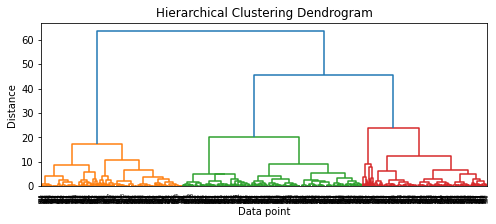

In [31]:
from scipy.cluster.hierarchy import dendrogram #a supp
import matplotlib.pyplot as plt

# seuil maximal pour la mesure de distance 
max_dist = 0.1

# plot the dendogram
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)

# plot the threshold (seuil de distance)
plt.axhline(y=max_dist, c='k', ls='--', lw=0.5)


[[0.97585507 0.97010758 0.95900046 ... 0.97374537 0.85378694 0.87956948]
 [0.75706813 0.87008576 0.89495502 ... 0.85468503 0.9742303  0.96798992]
 [0.91304389 0.9615315  0.9783395  ... 0.96405286 0.96298044 0.97360481]]


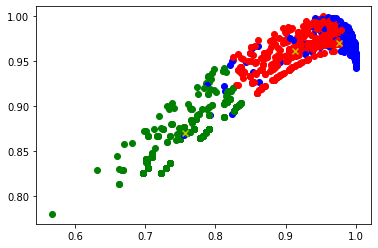

In [32]:
from sklearn.cluster import KMeans

# clusetering
km = KMeans(n_clusters=3, random_state=0)
km.fit_transform(similarity_matrix)

# affichage
Car_statF['Cluster_cos'] = km.labels_
print(km.cluster_centers_) #les paramètres du modèle dont les centroïdes finaux
for point in similarity_matrix: #plot des differents clusters
    if km.predict(point.reshape(1,-1)) == [0]:
        plt.scatter(point[0], point[1], c='b')
    elif km.predict(point.reshape(1,-1)) == [1]:
        plt.scatter(point[0], point[1], c='g')
    elif km.predict(point.reshape(1,-1)) == [2]:
        plt.scatter(point[0], point[1], c='r')
for center in km.cluster_centers_:
      plt.scatter(center[0],center[1],marker='x',color='y')
plt.show() # une figure qui montre à quelle point les distances sont proches

[[0.97585507 0.97010758 0.95900046 ... 0.97374537 0.85378694 0.87956948]
 [0.75706813 0.87008576 0.89495502 ... 0.85468503 0.9742303  0.96798992]
 [0.91304389 0.9615315  0.9783395  ... 0.96405286 0.96298044 0.97360481]]


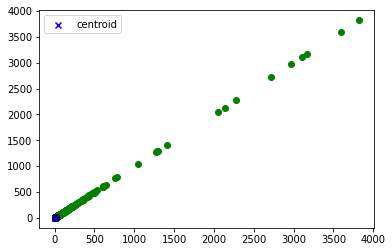

In [33]:
df1 = Car_statF[Car_statF.Cluster_cos==0] #plot des differents clusters
df2 = Car_statF[Car_statF.Cluster_cos==1]
df3 = Car_statF[Car_statF.Cluster_cos==2]
print(km.cluster_centers_)
plt.scatter(df1,df1,color='green')
plt.scatter(df2,df2,color='red')
plt.scatter(df3,df3,color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='blue',marker='x',label='centroid')
plt.legend()

In [34]:
Car_statF

,Nbr_Non_Apprécié,Nbr_Neutre,Nbr_Apprécié,Nbr_de_votes,Moyenne,Écart_type,Médiane,Cluster_eu_Car,Cluster_eu_2d,Cluster_eu,Cluster_cos
000100039X,10.0,8.0,188.0,206.0,4.674757,0.875712,5.0,0,0,0,0
0001055178,4.0,2.0,12.0,18.0,3.555556,0.983524,4.0,0,0,0,2
0001473123,1.0,0.0,15.0,16.0,4.625000,1.024695,5.0,0,0,0,2
0001473727,0.0,0.0,7.0,7.0,5.000000,0.000000,5.0,0,0,0,1
0001473905,0.0,1.0,5.0,6.0,4.666667,0.816497,5.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
0028632613,3.0,4.0,11.0,18.0,3.722222,1.363626,4.0,0,0,0,2
0028632753,3.0,2.0,0.0,5.0,2.400000,0.547723,2.0,0,0,0,1
0028633504,2.0,0.0,22.0,24.0,4.625000,0.875388,5.0,0,0,0,0
0028633784,0.0,1.0,6.0,7.0,4.428571,0.786796,5.0,0,0,0,1


In [35]:
Car_statF #visualisation des sous 3 dataframes representant chacune un cluster
print(df1.iloc[:,-1])
print(df2.iloc[:,-1])
df3.iloc[:,-1]


000100039X    0
0002007770    0
0002051850    0
0002113570    0
000215725X    0
             ..
0028621328    0
0028627431    0
0028627717    0
0028630238    0
0028633504    0
Name: Cluster_cos, Length: 293, dtype: int32
0001473727    1
0001473905    1
0002006715    1
0002007649    1
0002111306    1
             ..
0028631137    1
0028631552    1
0028632346    1
0028632753    1
0028633784    1
Name: Cluster_cos, Length: 296, dtype: int32


0001055178    2
0001473123    2
0001712772    2
000171287X    2
0001714538    2
             ..
002863196X    2
002863201X    2
0028632028    2
0028632613    2
0028633873    2
Name: Cluster_cos, Length: 366, dtype: int32

En utilisant l’**analyse en composante principale**, projectez vos segments
obtenus suivant les deux premiers composantes principales. De manière visuelle,
les segments sont-ils différents avec la distance euclidienne par rapport
aux segments obtenus avec la similarit´e cosinus?

In [36]:
#acp
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [37]:
Car_stat

,Nbr Non Apprécié,Nbr Neutre,Nbr Apprécié,Nbr de votes,"(overall, mean)","(overall, std)","(overall, median)"
000100039X,10.0,8.0,188.0,206.0,4.674757,0.875712,5.0
0001055178,4.0,2.0,12.0,18.0,3.555556,0.983524,4.0
0001473123,1.0,0.0,15.0,16.0,4.625000,1.024695,5.0
0001473727,0.0,0.0,7.0,7.0,5.000000,0.000000,5.0
0001473905,0.0,1.0,5.0,6.0,4.666667,0.816497,5.0
...,...,...,...,...,...,...,...
0028632613,3.0,4.0,11.0,18.0,3.722222,1.363626,4.0
0028632753,3.0,2.0,0.0,5.0,2.400000,0.547723,2.0
0028633504,2.0,0.0,22.0,24.0,4.625000,0.875388,5.0
0028633784,0.0,1.0,6.0,7.0,4.428571,0.786796,5.0


In [38]:
scaler = StandardScaler()
Car_stat_std = scaler.fit_transform(Car_stat)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


In [39]:
pca=PCA()
pca.fit(Car_stat_std)

PCA()

In [40]:
pca.explained_variance_ratio_ #the ratio explained by each of the 7 features

array([5.05634670e-01, 3.35489728e-01, 8.37334657e-02, 6.39915134e-02,
       7.67631338e-03, 3.47430900e-03, 1.10107552e-31])

Text(0, 0.5, ' Cumulative Explained Variance')

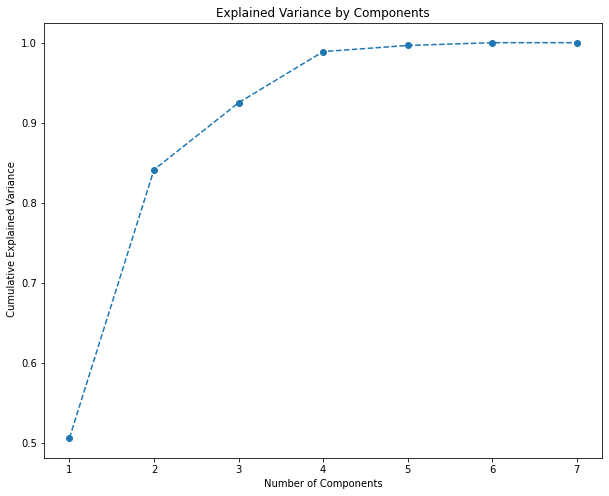

In [41]:
plt.figure(figsize = (10,8))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker ="o", linestyle ='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel(' Cumulative Explained Variance')

In [42]:
pca=PCA(n_components=2) # on choisit 2 composantes qui apparaissent le meilleur choix d'apres le graph qui précède

In [43]:
pca.fit(Car_stat_std)

PCA(n_components=2)

In [44]:
pca.transform(Car_stat_std)
scores_pca = pca.transform(Car_stat_std)
scores_pca

array([[ 0.6459142 , -1.18608366],
       [-0.01774841,  1.5295142 ],
       [-0.38597086, -0.70622819],
       ...,
       [-0.37794899, -0.91735069],
       [-0.44352623, -0.76076809],
       [-0.48932695, -1.07947669]])

In [45]:
# We fit K means using the transformed data from the PCA.
wcss = []
for i in range(1,21):
   kmeans_pca_eu = KMeans(n_clusters =i , init = 'k-means++', random_state=42)
   kmeans_pca_eu.fit(scores_pca)
   wcss.append(kmeans_pca_eu.inertia_)

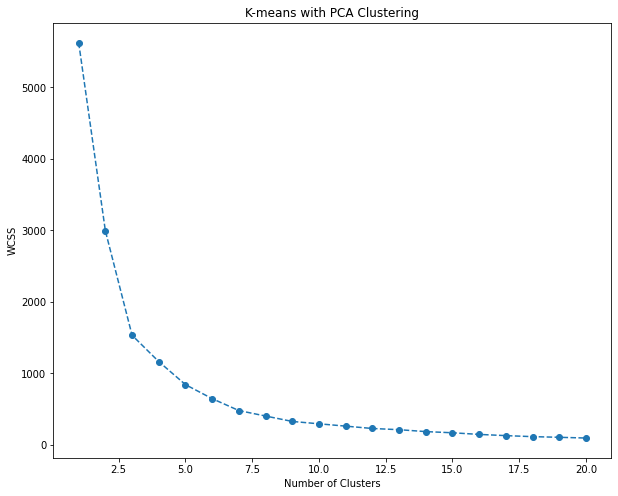

In [46]:
plt.figure(figsize = (10,8))#a supp
plt.plot(range(1, 21), wcss, marker = 'o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [47]:
# We have chosen 3 clusters, So we run k-means with number of clusters equals three.
# Same initializer and random state as before.
kmeans_pca_eu = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans_pca_eu.fit(scores_pca)

KMeans(n_clusters=3, random_state=42)

In [48]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters.
df_segm_pca_kmeans=pd.concat([Car_statF.reset_index(drop=True),pd.DataFrame(scores_pca)],axis= 1)
df_segm_pca_kmeans.columns.values[-2:]=['Composante 1', 'Composante 2']
# The last column we add contains the pa k-means clustering Labels.
df_segm_pca_kmeans['Segment K-means PCA eu'] = kmeans_pca_eu.labels_

In [49]:
df_segm_pca_kmeans

,Nbr_Non_Apprécié,Nbr_Neutre,Nbr_Apprécié,Nbr_de_votes,Moyenne,Écart_type,Médiane,Cluster_eu_Car,Cluster_eu_2d,Cluster_eu,Cluster_cos,Composante 1,Composante 2,Segment K-means PCA eu
0,10.0,8.0,188.0,206.0,4.674757,0.875712,5.0,0,0,0,0,0.645914,-1.186084,0
1,4.0,2.0,12.0,18.0,3.555556,0.983524,4.0,0,0,0,2,-0.017748,1.529514,1
2,1.0,0.0,15.0,16.0,4.625000,1.024695,5.0,0,0,0,2,-0.385971,-0.706228,0
3,0.0,0.0,7.0,7.0,5.000000,0.000000,5.0,0,0,0,1,-0.775024,-2.582763,0
4,0.0,1.0,5.0,6.0,4.666667,0.816497,5.0,0,0,0,1,-0.488315,-1.034011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,3.0,4.0,11.0,18.0,3.722222,1.363626,4.0,0,0,0,2,0.066736,1.823155,1
951,3.0,2.0,0.0,5.0,2.400000,0.547723,2.0,0,0,0,1,0.226189,4.242402,1
952,2.0,0.0,22.0,24.0,4.625000,0.875388,5.0,0,0,0,0,-0.377949,-0.917351,0
953,0.0,1.0,6.0,7.0,4.428571,0.786796,5.0,0,0,0,1,-0.443526,-0.760768,0


In [50]:
df_segm_pca_kmeans['Segment eu'] = df_segm_pca_kmeans['Segment K-means PCA eu'].map({0:'Cluster 1', 1:'Cluster 2', 2:'Cluster 3'})
df_segm_pca_kmeans

,Nbr_Non_Apprécié,Nbr_Neutre,Nbr_Apprécié,Nbr_de_votes,Moyenne,Écart_type,Médiane,Cluster_eu_Car,Cluster_eu_2d,Cluster_eu,Cluster_cos,Composante 1,Composante 2,Segment K-means PCA eu,Segment eu
0,10.0,8.0,188.0,206.0,4.674757,0.875712,5.0,0,0,0,0,0.645914,-1.186084,0,Cluster 1
1,4.0,2.0,12.0,18.0,3.555556,0.983524,4.0,0,0,0,2,-0.017748,1.529514,1,Cluster 2
2,1.0,0.0,15.0,16.0,4.625000,1.024695,5.0,0,0,0,2,-0.385971,-0.706228,0,Cluster 1
3,0.0,0.0,7.0,7.0,5.000000,0.000000,5.0,0,0,0,1,-0.775024,-2.582763,0,Cluster 1
4,0.0,1.0,5.0,6.0,4.666667,0.816497,5.0,0,0,0,1,-0.488315,-1.034011,0,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,3.0,4.0,11.0,18.0,3.722222,1.363626,4.0,0,0,0,2,0.066736,1.823155,1,Cluster 2
951,3.0,2.0,0.0,5.0,2.400000,0.547723,2.0,0,0,0,1,0.226189,4.242402,1,Cluster 2
952,2.0,0.0,22.0,24.0,4.625000,0.875388,5.0,0,0,0,0,-0.377949,-0.917351,0,Cluster 1
953,0.0,1.0,6.0,7.0,4.428571,0.786796,5.0,0,0,0,1,-0.443526,-0.760768,0,Cluster 1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


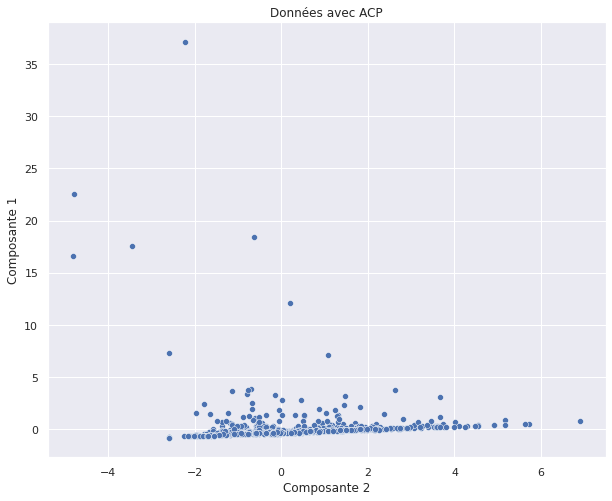

In [51]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
x_axis = df_segm_pca_kmeans['Composante 2']
y_axis = df_segm_pca_kmeans['Composante 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis)
plt.title('Données avec ACP')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


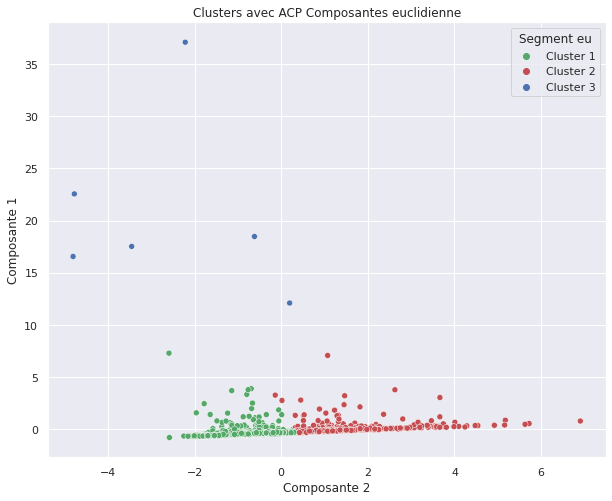

In [52]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment eu'], palette = ['g', 'r', 'b'])
plt.title('Clusters avec ACP Composantes euclidienne')
plt.show()

On remarque que lorsque nous utilisons l'ACP avant d'utiliser les K-means, nous pouvons séparer visuellement la quasi-totalité de l'ensemble des données. C'était l'un des principaux objectifs de l'ACP : réduire le nombre de variables en les combinant en caractéristiques plus grandes et plus significatives.

De plus, ils sont "orthogonaux" les uns par rapport aux autres. Cela signifie que la différence entre les composantes est aussi grande que possible.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


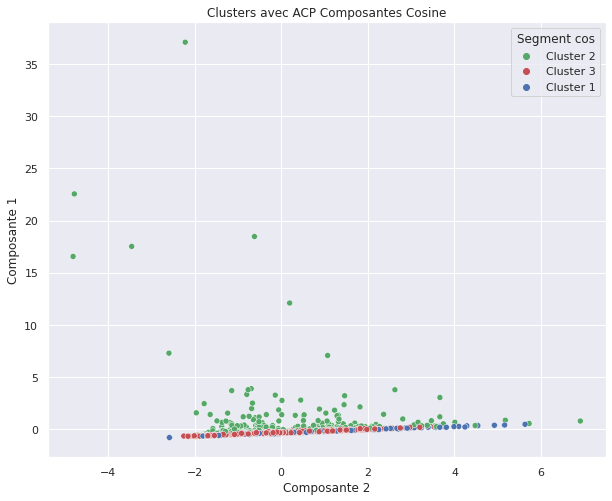

In [53]:
scaler = StandardScaler()
Car_stat_sim = scaler.fit_transform(similarity_matrix)
pca=PCA(n_components=2)
pca.fit(Car_stat_sim)
scores_pca_cos = pca.transform(Car_stat_sim)
scores_pca_cos
# We have chosen 3 clusters, So we run k-means with number of clusters equals three.
# Same initializer and random state as before.
kmeans_pca_cos = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans_pca_cos.fit(scores_pca_cos)
# The last column we add contains the pa k-means clustering Labels.
df_segm_pca_kmeans['Segment K-means PCA cos'] = kmeans_pca_cos.labels_
df_segm_pca_kmeans['Segment cos'] = df_segm_pca_kmeans['Segment K-means PCA cos'].map({0:'Cluster 1', 1:'Cluster 2', 2:'Cluster 3'})
df_segm_pca_kmeans
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
x_axis = df_segm_pca_kmeans['Composante 2']
y_axis = df_segm_pca_kmeans['Composante 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment cos'], palette = ['g', 'r', 'b'])
plt.title('Clusters avec ACP Composantes Cosine')
plt.show()

In [54]:
df_segm_pca_kmeans

,Nbr_Non_Apprécié,Nbr_Neutre,Nbr_Apprécié,Nbr_de_votes,Moyenne,Écart_type,Médiane,Cluster_eu_Car,Cluster_eu_2d,Cluster_eu,Cluster_cos,Composante 1,Composante 2,Segment K-means PCA eu,Segment eu,Segment K-means PCA cos,Segment cos
0,10.0,8.0,188.0,206.0,4.674757,0.875712,5.0,0,0,0,0,0.645914,-1.186084,0,Cluster 1,1,Cluster 2
1,4.0,2.0,12.0,18.0,3.555556,0.983524,4.0,0,0,0,2,-0.017748,1.529514,1,Cluster 2,2,Cluster 3
2,1.0,0.0,15.0,16.0,4.625000,1.024695,5.0,0,0,0,2,-0.385971,-0.706228,0,Cluster 1,2,Cluster 3
3,0.0,0.0,7.0,7.0,5.000000,0.000000,5.0,0,0,0,1,-0.775024,-2.582763,0,Cluster 1,2,Cluster 3
4,0.0,1.0,5.0,6.0,4.666667,0.816497,5.0,0,0,0,1,-0.488315,-1.034011,0,Cluster 1,0,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,3.0,4.0,11.0,18.0,3.722222,1.363626,4.0,0,0,0,2,0.066736,1.823155,1,Cluster 2,2,Cluster 3
951,3.0,2.0,0.0,5.0,2.400000,0.547723,2.0,0,0,0,1,0.226189,4.242402,1,Cluster 2,0,Cluster 1
952,2.0,0.0,22.0,24.0,4.625000,0.875388,5.0,0,0,0,0,-0.377949,-0.917351,0,Cluster 1,2,Cluster 3
953,0.0,1.0,6.0,7.0,4.428571,0.786796,5.0,0,0,0,1,-0.443526,-0.760768,0,Cluster 1,2,Cluster 3


3/ spectral clustering

In [55]:
from scipy.spatial import distance
from scipy import linalg

            Nbr_Non_Apprécié  Nbr_Neutre  Nbr_Apprécié  Nbr_de_votes  \
000100039X              10.0         8.0         188.0         206.0   
0001055178               4.0         2.0          12.0          18.0   
0001473123               1.0         0.0          15.0          16.0   
0001473727               0.0         0.0           7.0           7.0   
0001473905               0.0         1.0           5.0           6.0   
...                      ...         ...           ...           ...   
0028632613               3.0         4.0          11.0          18.0   
0028632753               3.0         2.0           0.0           5.0   
0028633504               2.0         0.0          22.0          24.0   
0028633784               0.0         1.0           6.0           7.0   
0028633873               0.0         1.0           7.0           8.0   

             Moyenne  Écart_type  
000100039X  4.674757    0.875712  
0001055178  3.555556    0.983524  
0001473123  4.625000    1.0246

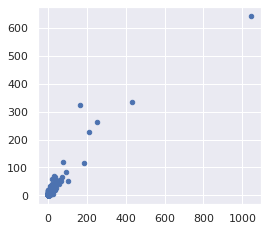

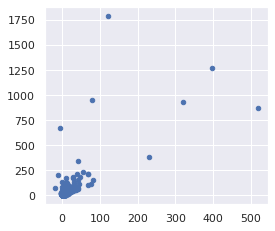

In [56]:
X= Car_statF.iloc[:,0:6]
print(X) # composée de 2 dimensions et 955 lignes de livres
transformation = [[0.60,-0.63],[-0.40,0.85]]*3
plt.figure(figsize=(4,8))
plt.subplot(211)
plt.scatter(X.T.iloc[0],X.T.iloc[1],s=20)
X_aniso=np.dot(X,transformation) #distribution anisotropique
print(X_aniso)
plt.figure(figsize=(4,8))
plt.subplot(211)
plt.scatter(X_aniso[:,0],X_aniso[:,1],s=20)


In [57]:
rbf_param =7.6 #hyperparapetre pour accélerer la convergence de 2 point
#trouver M
from scipy.spatial import distance
K =np.exp(-rbf_param*distance.cdist(X,X,metric='sqeuclidean')) #similarity between each 2 nodes
K

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 2.52835627e-90, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.52835627e-90, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.84218449e-07],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.84218449e-07, 1.00000000e+00]])

In [58]:
D=K.sum(axis=1) #faire la somme des lignes pour avoir des di
D #matrice ligne avec 955 val
D=np.sqrt(1/D)
M=np.multiply(D[np.newaxis,:],np.multiply(K,D[:,np.newaxis]))
M

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.99999934e-01, 1.40134731e-90, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.40134731e-90, 3.07195644e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.99999083e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.95060449e-02, 2.54235142e-08],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.54235142e-08, 1.91405958e-01]])

[[-0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-7.92371435e-04 -2.19919981e-25  1.97925573e-25]
 [-1.42962021e-03 -1.94113210e-10 -7.45074667e-11]
 ...
 [-7.92241481e-04 -2.49891918e-09  5.72975251e-09]
 [-2.51192105e-03  2.29391165e-10 -1.76294562e-10]
 [-1.81114389e-03  1.53343887e-10 -1.33531874e-10]]


Text(0.5, 1.0, 'Labels returned by Spectral clustering euclidien')

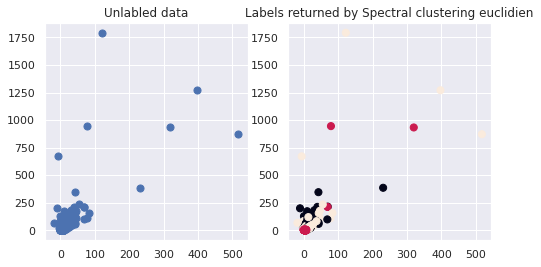

In [59]:
from sklearn.preprocessing import normalize 
#step2 
P,D,Pt=linalg.svd(M, full_matrices=True, lapack_driver='gesvd')
Psubset = P[:,0:3] #nbr of eigenvectors = nbr of clusters
print(Psubset)

#print(D) #singular values in decreasing order
y_pred_sc=KMeans(n_clusters=3).fit_predict(normalize(Psubset))
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(X_aniso[:,0],X_aniso[:,1],s=50)
plt.title('Unlabled data')
plt.subplot(122)
plt.scatter(X_aniso[:,0],X_aniso[:,1],c=y_pred_sc,s=50)
plt.title('Labels returned by Spectral clustering euclidien')

La d

[[-0.03133746  0.04595357 -0.01710895]
 [-0.03316686  0.02487302  0.02959124]
 [-0.03433234  0.01591567 -0.02294827]
 ...
 [-0.03363467  0.02814804 -0.01936914]
 [-0.03385994 -0.02951036 -0.01083452]
 [-0.03434704 -0.02255032 -0.01453277]]


Text(0.5, 1.0, 'Labels returned by Spectral clustering cosine')

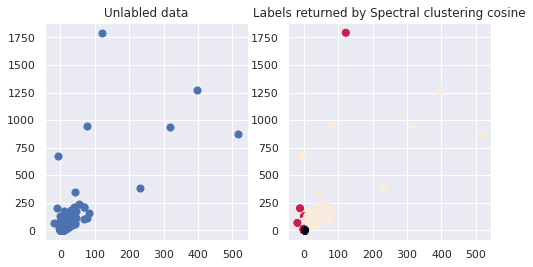

In [60]:
#avec la distance cosine
Kc =np.exp(-rbf_param*distance.cdist(X,X,metric='cosine')) #similarity between each 2 nodes
Kc
Dc=Kc.sum(axis=1) #faire la somme des lignes pour avoir des di
Dc #matrice ligne avec 955 val
Dc=np.sqrt(1/Dc)
Mc=np.multiply(Dc[np.newaxis,:],np.multiply(Kc,Dc[:,np.newaxis]))
Mc

#step2 
Pc,Dc,Pct=linalg.svd(Mc, full_matrices=True, lapack_driver='gesvd')
Pcsubset = Pc[:,0:3] #nbr of eigenvectors = nbr of clusters
print(Pcsubset)

#print(D) #singular values in decreasing order
y_pred_scc=KMeans(n_clusters=3).fit_predict(normalize(Pcsubset))
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(X_aniso[:,0],X_aniso[:,1],s=50)
plt.title('Unlabled data')
plt.subplot(122)
plt.scatter(X_aniso[:,0],X_aniso[:,1],c=y_pred_scc,s=50)
plt.title('Labels returned by Spectral clustering cosine')

In [61]:
Car_statF['segemtation SC']=y_pred_scc
Car_statF

,Nbr_Non_Apprécié,Nbr_Neutre,Nbr_Apprécié,Nbr_de_votes,Moyenne,Écart_type,Médiane,Cluster_eu_Car,Cluster_eu_2d,Cluster_eu,Cluster_cos,segemtation SC
000100039X,10.0,8.0,188.0,206.0,4.674757,0.875712,5.0,0,0,0,0,2
0001055178,4.0,2.0,12.0,18.0,3.555556,0.983524,4.0,0,0,0,2,1
0001473123,1.0,0.0,15.0,16.0,4.625000,1.024695,5.0,0,0,0,2,2
0001473727,0.0,0.0,7.0,7.0,5.000000,0.000000,5.0,0,0,0,1,0
0001473905,0.0,1.0,5.0,6.0,4.666667,0.816497,5.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
0028632613,3.0,4.0,11.0,18.0,3.722222,1.363626,4.0,0,0,0,2,1
0028632753,3.0,2.0,0.0,5.0,2.400000,0.547723,2.0,0,0,0,1,1
0028633504,2.0,0.0,22.0,24.0,4.625000,0.875388,5.0,0,0,0,0,2
0028633784,0.0,1.0,6.0,7.0,4.428571,0.786796,5.0,0,0,0,1,0


Le coefficient de silhouette d'un échantillon est (b - a) / max(a, b). Pour clarifier, b est la distance entre un échantillon et le cluster le plus proche dont l'échantillon ne fait pas partie. Notez que le coefficient de silhouette n'est défini que si le nombre d'étiquettes est 2 <= n_labels <= n_samples - 1.

In [62]:
#silouhette et info mutuelle pour Kmeans sans pca
#silouhette
from sklearn.metrics import silhouette_score
#KMEANS,euc
silouette_km_euc = silhouette_score(Car_statF[['Nbr_de_votes','Moyenne']],Car_statF['Cluster_eu'], metric='euclidean')
print('Score Silhouette pour KMeans avec distance euclidienne : %.3f' % silouette_km_euc)
#KMEANS,cos
silouette_km_cos= silhouette_score(similarity_matrix, Car_statF['Cluster_cos'], metric='cosine')
print('Score Silhouette pour KMeans avec similarité cosinus : %.3f' % silouette_km_cos)
#info mutuelle
import sklearn
#kmeans,euc
labels_true=T['Classe']
InfoMut_km_euc=sklearn.metrics.normalized_mutual_info_score(labels_true, Car_statF['Cluster_eu'],average_method='arithmetic')
print('Score Info Mutuelle pour KMeans avec distance euclidienne : %.3f' % InfoMut_km_euc)
#kmeans,cos
InfoMut_km_cos=sklearn.metrics.normalized_mutual_info_score(labels_true, Car_statF['Cluster_cos'],average_method='arithmetic')
print('Score Info Mutuelle pour KMeans avec similarité cosinus : %.3f' % InfoMut_km_cos)

Score Silhouette pour KMeans avec distance euclidienne : 0.932
Score Silhouette pour KMeans avec similarité cosinus : 0.626
Score Info Mutuelle pour KMeans avec distance euclidienne : 0.010
Score Info Mutuelle pour KMeans avec similarité cosinus : 0.013


In [63]:
#silouhette et info mutuelle pour Kmeans avec pca
#silouhette
from sklearn.metrics import silhouette_score
#KMEANS,euc
silouette_km_euc = silhouette_score(Car_statF[['Nbr_de_votes','Moyenne']],df_segm_pca_kmeans['Segment K-means PCA eu'], metric='euclidean')
print('Score Silhouette pour KMeans avec distance euclidienne : %.3f' % silouette_km_euc)
#KMEANS,cos
silouette_km_cos= silhouette_score(similarity_matrix, df_segm_pca_kmeans['Segment K-means PCA cos'], metric='cosine')
print('Score Silhouette pour KMeans avec similarité cosinus : %.3f' % silouette_km_cos)
#info mutuelle
import sklearn
#kmeans,euc
labels_true=T['Classe']
InfoMut_km_euc=sklearn.metrics.normalized_mutual_info_score(labels_true,df_segm_pca_kmeans['Segment K-means PCA eu'],average_method='arithmetic')
print('Score Info Mutuelle pour KMeans avec distance euclidienne : %.3f' % InfoMut_km_euc)
#kmeans,cos
InfoMut_km_cos=sklearn.metrics.normalized_mutual_info_score(labels_true,df_segm_pca_kmeans['Segment K-means PCA cos'],average_method='arithmetic')
print('Score Info Mutuelle pour KMeans avec similarité cosinus : %.3f' % InfoMut_km_cos)

Score Silhouette pour KMeans avec distance euclidienne : -0.018
Score Silhouette pour KMeans avec similarité cosinus : 0.547
Score Info Mutuelle pour KMeans avec distance euclidienne : 0.167
Score Info Mutuelle pour KMeans avec similarité cosinus : 0.025


In [64]:
#silouhette et info mutuelle pour spectral clustering
#silouhette
from sklearn.metrics import silhouette_score
#KMEANS,euc
silouette_km_eucc = silhouette_score(Car_statF[['Nbr_de_votes','Moyenne']],y_pred_sc, metric='euclidean')
print('Score Silhouette pour KMeans avec distance euclidienne : %.3f' % silouette_km_eucc)
#KMEANS,cos
silouette_km_cosc= silhouette_score(similarity_matrix,y_pred_scc, metric='cosine')
print('Score Silhouette pour KMeans avec similarité cosinus : %.3f' % silouette_km_cosc)
#info mutuelle
import sklearn
#kmeans,euc
labels_true=T['Classe']
InfoMut_km_eucc=sklearn.metrics.normalized_mutual_info_score(labels_true,y_pred_sc,average_method='arithmetic')
print('Score Info Mutuelle pour KMeans avec distance euclidienne : %.3f' % InfoMut_km_eucc)
#kmeans,cos
InfoMut_km_cosc=sklearn.metrics.normalized_mutual_info_score(labels_true,y_pred_scc,average_method='arithmetic')
print('Score Info Mutuelle pour KMeans avec similarité cosinus : %.3f' % InfoMut_km_cosc)

Score Silhouette pour KMeans avec distance euclidienne : 0.563
Score Silhouette pour KMeans avec similarité cosinus : 0.480
Score Info Mutuelle pour KMeans avec distance euclidienne : 0.004
Score Info Mutuelle pour KMeans avec similarité cosinus : 0.208


In [65]:
Result=pd.DataFrame(data=None, index=['KMeans','Spectrale'], columns=['distance euclidienne silhouette','distance euclidienne info. mut','similarité cosinus silhouette','similarité cosinus info. mut'])
Result.iloc[0][0]=silouette_km_euc
Result.iloc[0][1]=InfoMut_km_euc
Result.iloc[0][2]=silouette_km_cos
Result.iloc[0][3]=InfoMut_km_cos
Result.iloc[1][0]=silouette_km_eucc
Result.iloc[1][1]=InfoMut_km_eucc
Result.iloc[1][2]=silouette_km_cosc
Result.iloc[1][3]=InfoMut_km_cosc
Result

,distance euclidienne silhouette,distance euclidienne info. mut,similarité cosinus silhouette,similarité cosinus info. mut
KMeans,0.931572,0.010142,0.626173,0.013305
Spectrale,0.562769,0.003985,0.479828,0.207777


# **PARTIE B**

1) Selon vous quel serait le risque de prendre al ́eatoirement un sous-ensemble de données pour effectuer les tâches a-1) à a-5) ?



2) En procédant par une sélection stratifiée, on voudrait s’assurer que toutes les catégories soient représentées dans notre sous-ensemble.

p1=p2=p3=p4=p5.  #Sklearn.StratifiedShuffleSplit() function in Python

In [67]:
(T['Classe'].value_counts()) / len(T) * 100

2.0    91.727749
1.0     7.853403
0.0     0.418848
Name: Classe, dtype: float64

In [68]:
(df['overall'].value_counts())/ len(df)*100

5    56.416
4    22.326
3    10.896
2     5.706
1     4.656
Name: overall, dtype: float64

1. Construire un DataFrame qui comptabilise le nombre de fois qu'un livre est apprécié dans une catégorie comme suit :

In [69]:
M_Card = Car_statF.T.iloc[0:3].T
M_Card

,Nbr_Non_Apprécié,Nbr_Neutre,Nbr_Apprécié
000100039X,10.0,8.0,188.0
0001055178,4.0,2.0,12.0
0001473123,1.0,0.0,15.0
0001473727,0.0,0.0,7.0
0001473905,0.0,1.0,5.0
...,...,...,...
0028632613,3.0,4.0,11.0
0028632753,3.0,2.0,0.0
0028633504,2.0,0.0,22.0
0028633784,0.0,1.0,6.0


2. Prendre le maximum et associé la catégorie correspondante (tel que dans un vote de majorité) comme suit :

In [70]:
# find the maximum of each column
maxValues = M_Card.max(axis = 1)
print(maxValues)

000100039X    188.0
0001055178     12.0
0001473123     15.0
0001473727      7.0
0001473905      5.0
              ...  
0028632613     11.0
0028632753      3.0
0028633504     22.0
0028633784      6.0
0028633873      7.0
Length: 955, dtype: float64


In [71]:
# find the index position of maximum
# values in every column
maxValueIndex = pd.DataFrame(M_Card.idxmax(axis=1),columns=['Catégorie'])
#print("Maximum values of columns are at row index position :")
maxValueIndex

,Catégorie
000100039X,Nbr_Apprécié
0001055178,Nbr_Apprécié
0001473123,Nbr_Apprécié
0001473727,Nbr_Apprécié
0001473905,Nbr_Apprécié
...,...
0028632613,Nbr_Apprécié
0028632753,Nbr_Non_Apprécié
0028633504,Nbr_Apprécié
0028633784,Nbr_Apprécié


In [72]:
(maxValueIndex.value_counts()) / len(maxValueIndex) * 100

Catégorie       
Nbr_Apprécié        95.602094
Nbr_Non_Apprécié     2.513089
Nbr_Neutre           1.884817
dtype: float64

In [73]:
Data_b = pd.concat([Car_statF.T.iloc[0:7],maxValueIndex.T]).T
Data_b

,Nbr_Non_Apprécié,Nbr_Neutre,Nbr_Apprécié,Nbr_de_votes,Moyenne,Écart_type,Médiane,Catégorie
000100039X,10.0,8.0,188.0,206.0,4.674757,0.875712,5.0,Nbr_Apprécié
0001055178,4.0,2.0,12.0,18.0,3.555556,0.983524,4.0,Nbr_Apprécié
0001473123,1.0,0.0,15.0,16.0,4.625,1.024695,5.0,Nbr_Apprécié
0001473727,0.0,0.0,7.0,7.0,5.0,0.0,5.0,Nbr_Apprécié
0001473905,0.0,1.0,5.0,6.0,4.666667,0.816497,5.0,Nbr_Apprécié
...,...,...,...,...,...,...,...,...
0028632613,3.0,4.0,11.0,18.0,3.722222,1.363626,4.0,Nbr_Apprécié
0028632753,3.0,2.0,0.0,5.0,2.4,0.547723,2.0,Nbr_Non_Apprécié
0028633504,2.0,0.0,22.0,24.0,4.625,0.875388,5.0,Nbr_Apprécié
0028633784,0.0,1.0,6.0,7.0,4.428571,0.786796,5.0,Nbr_Apprécié


In [74]:
# Disproportionate sampling:
# randomly select 500 samples from each stratum
df_stratified=Data_b.groupby('Catégorie', group_keys=False).apply(lambda x: x.sample(18))
df_stratified

,Nbr_Non_Apprécié,Nbr_Neutre,Nbr_Apprécié,Nbr_de_votes,Moyenne,Écart_type,Médiane,Catégorie
0007270720,0.0,0.0,9.0,9.0,4.444444,0.527046,4.0,Nbr_Apprécié
0007271166,1.0,3.0,91.0,95.0,4.621053,0.604574,5.0,Nbr_Apprécié
0007419457,2.0,4.0,31.0,37.0,4.135135,1.004494,4.0,Nbr_Apprécié
0006550436,11.0,33.0,186.0,230.0,4.186957,0.898715,4.0,Nbr_Apprécié
0020867506,0.0,0.0,8.0,8.0,4.75,0.46291,5.0,Nbr_Apprécié
0006128513,1.0,1.0,3.0,5.0,3.6,1.140175,4.0,Nbr_Apprécié
0006755216,1.0,2.0,9.0,12.0,4.25,1.05529,5.0,Nbr_Apprécié
0028614496,3.0,1.0,5.0,9.0,3.333333,1.658312,4.0,Nbr_Apprécié
0007344201,4.0,4.0,21.0,29.0,3.862069,1.27403,4.0,Nbr_Apprécié
0027136701,0.0,6.0,47.0,53.0,4.584906,0.691541,5.0,Nbr_Apprécié


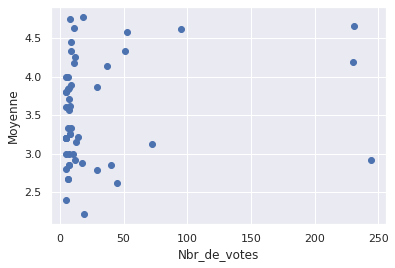

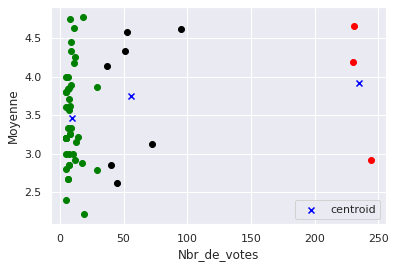

In [75]:
km = KMeans(n_clusters=3)
y_predicted_eu = km.fit_predict(df_stratified[['Nbr_de_votes','Moyenne']])
df_stratified['Cluster_eu']=y_predicted_eu
#print(df_stratified)
plt.scatter(df_stratified['Nbr_de_votes'],df_stratified['Moyenne'])
plt.xlabel('Nbr_de_votes')
plt.ylabel('Moyenne')
plt.show()
#print(km.cluster_centers_)
df1 = df_stratified[df_stratified.Cluster_eu==0] #plot des differents clusters
df2 = df_stratified[df_stratified.Cluster_eu==1]
df3 = df_stratified[df_stratified.Cluster_eu==2]
plt.scatter(df1['Nbr_de_votes'],df1['Moyenne'],color='green')
plt.scatter(df2['Nbr_de_votes'],df2['Moyenne'],color='red')
plt.scatter(df3['Nbr_de_votes'],df3['Moyenne'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='blue',marker='x',label='centroid')
plt.xlabel('Nbr_de_votes')
plt.ylabel('Moyenne')
plt.legend()


Text(0, 0.5, 'Nbr_Non_Apprécié')

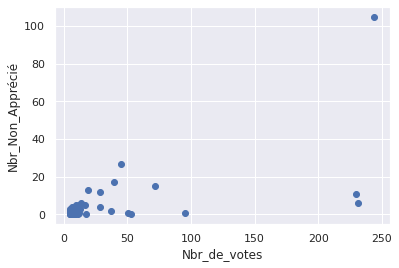

In [76]:
plt.scatter(df_stratified['Nbr_de_votes'],df_stratified['Nbr_Non_Apprécié'])
plt.xlabel('Nbr_de_votes')
plt.ylabel('Nbr_Non_Apprécié')

In [77]:
km = KMeans(n_clusters=3)
y_predicted_eu = km.fit_predict(df_stratified[['Nbr_de_votes','Nbr_Non_Apprécié']]) #apprentissage  grâce à la méthode fit()
y_predicted_eu

array([0, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 2, 0], dtype=int32)

In [78]:
df_stratified['Cluster_eu']=y_predicted_eu  #ajout d'une colonne définissant le cluster
df_stratified

,Nbr_Non_Apprécié,Nbr_Neutre,Nbr_Apprécié,Nbr_de_votes,Moyenne,Écart_type,Médiane,Catégorie,Cluster_eu
0007270720,0.0,0.0,9.0,9.0,4.444444,0.527046,4.0,Nbr_Apprécié,0
0007271166,1.0,3.0,91.0,95.0,4.621053,0.604574,5.0,Nbr_Apprécié,2
0007419457,2.0,4.0,31.0,37.0,4.135135,1.004494,4.0,Nbr_Apprécié,2
0006550436,11.0,33.0,186.0,230.0,4.186957,0.898715,4.0,Nbr_Apprécié,1
0020867506,0.0,0.0,8.0,8.0,4.75,0.46291,5.0,Nbr_Apprécié,0
0006128513,1.0,1.0,3.0,5.0,3.6,1.140175,4.0,Nbr_Apprécié,0
0006755216,1.0,2.0,9.0,12.0,4.25,1.05529,5.0,Nbr_Apprécié,0
0028614496,3.0,1.0,5.0,9.0,3.333333,1.658312,4.0,Nbr_Apprécié,0
0007344201,4.0,4.0,21.0,29.0,3.862069,1.27403,4.0,Nbr_Apprécié,0
0027136701,0.0,6.0,47.0,53.0,4.584906,0.691541,5.0,Nbr_Apprécié,2


In [79]:
km.cluster_centers_#les paramètres du modèle dont les centroïdes finaux

array([[  9.11363636,   2.13636364],
       [235.        ,  40.66666667],
       [ 56.14285714,   9.        ]])

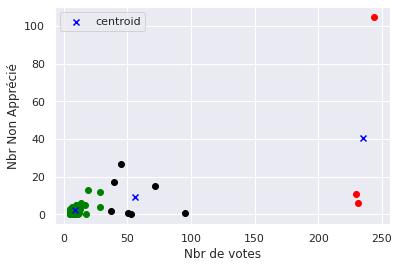

In [80]:
df1 = df_stratified[df_stratified.Cluster_eu==0] #plot des differents clusters
df2 = df_stratified[df_stratified.Cluster_eu==1]
df3 = df_stratified[df_stratified.Cluster_eu==2]

plt.scatter(df1['Nbr_de_votes'],df1['Nbr_Non_Apprécié'],color='green')
plt.scatter(df2['Nbr_de_votes'],df2['Nbr_Non_Apprécié'],color='red')
plt.scatter(df3['Nbr_de_votes'],df3['Nbr_Non_Apprécié'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='blue',marker='x',label='centroid')
plt.xlabel('Nbr de votes')
plt.ylabel('Nbr Non Apprécié')
plt.legend()

In [81]:
from sklearn.metrics.pairwise import cosine_similarity #matrice de similarité de cosinus
similarity_matrix = cosine_similarity(df_stratified.T.iloc[2:5].T)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,1.000000,0.954870,0.965150,0.943432,0.998107,0.952528,0.989080,0.965180,0.962218,0.961727,...,0.906171,0.923980,0.925753,0.744494,0.936514,0.859568,0.936402,0.848029,0.843765,0.918505
1,0.954870,1.000000,0.996532,0.996267,0.934842,0.847665,0.964143,0.930428,0.988054,0.998828,...,0.845958,0.917152,0.922756,0.665822,0.888380,0.915236,0.883428,0.879034,0.885794,0.826753
2,0.965150,0.996532,1.000000,0.997309,0.948155,0.882205,0.980492,0.957088,0.997287,0.999391,...,0.887226,0.946697,0.951097,0.725449,0.923222,0.937651,0.918928,0.910394,0.914657,0.868603
3,0.943432,0.996267,0.997309,1.000000,0.922306,0.849967,0.965247,0.941457,0.994241,0.997696,...,0.868348,0.939325,0.944479,0.707042,0.905947,0.945962,0.900520,0.914071,0.920790,0.841501
4,0.998107,0.934842,0.948155,0.922306,1.000000,0.964491,0.983724,0.962690,0.946717,0.943459,...,0.910304,0.916648,0.917569,0.755286,0.937511,0.840212,0.938395,0.834233,0.827687,0.928744
5,0.952528,0.847665,0.882205,0.849967,0.964491,1.000000,0.957530,0.970889,0.899175,0.868551,...,0.969481,0.936471,0.933395,0.885113,0.973897,0.841324,0.976965,0.864838,0.850551,0.989511
6,0.989080,0.964143,0.980492,0.965247,0.983724,0.957530,1.000000,0.990813,0.985678,0.974501,...,0.946960,0.969580,0.971009,0.811867,0.971050,0.923920,0.969726,0.916868,0.913511,0.944269
7,0.965180,0.930428,0.957088,0.941457,0.962690,0.970889,0.990813,1.000000,0.972164,0.946741,...,0.981297,0.989885,0.989621,0.883047,0.994303,0.943029,0.993450,0.949094,0.942982,0.974367
8,0.962218,0.988054,0.997287,0.994241,0.946717,0.899175,0.985678,0.972164,1.000000,0.994252,...,0.915514,0.967613,0.971110,0.772377,0.945735,0.957481,0.941683,0.937272,0.940008,0.894543
9,0.961727,0.998828,0.999391,0.997696,0.943459,0.868551,0.974501,0.946741,0.994252,1.000000,...,0.870689,0.935092,0.939999,0.701050,0.909411,0.928971,0.904842,0.897948,0.903255,0.851840


[[0.87508649 0.8983382  0.92749833 0.92844179 0.86236686 0.88413281
  0.93561517 0.96161083 0.95117633 0.91600398 0.89967311 0.9145104
  0.92114934 0.89852556 0.9207612  0.93845909 0.9038996  0.8504868
  0.90184033 0.90936413 0.99255497 0.90936413 0.98975225 0.87508936
  0.94276138 0.95611511 0.9090889  0.93790372 0.90936413 0.96588404
  0.99437884 0.90936413 0.93290354 0.87508936 0.9090889  0.96588404
  0.98291776 0.99374039 0.90936413 0.99451235 0.94189294 0.91695394
  0.9628983  0.93012408 0.95727943 0.98843557 0.98888976 0.89644095
  0.96450594 0.98980038 0.96053557 0.99411235 0.99304055 0.92023171]
 [0.9177881  0.8399868  0.87913829 0.85517321 0.92511609 0.97716457
  0.9455407  0.97283795 0.90357593 0.86350612 0.92682036 0.95486042
  0.86721217 0.83301549 0.93777717 0.9667143  0.89594744 0.95519803
  0.98472688 0.98670729 0.89883787 0.98670729 0.96076351 0.97800686
  0.98907129 0.98708859 0.98590834 0.98932321 0.98670729 0.98407945
  0.93983646 0.98670729 0.98934595 0.97800686 0.9

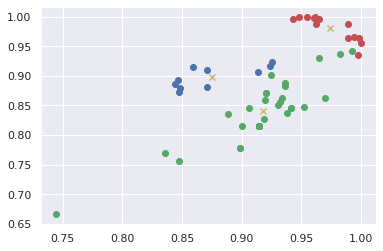

In [82]:
from sklearn.cluster import KMeans

# clusetering
km = KMeans(n_clusters=3, random_state=0)
km.fit_transform(similarity_matrix)

# affichage
df_stratified['Cluster_cos'] = km.labels_
print(km.cluster_centers_) #les paramètres du modèle dont les centroïdes finaux
for point in similarity_matrix: #plot des differents clusters
    if km.predict(point.reshape(1,-1)) == [0]:
        plt.scatter(point[0], point[1], c='b')
    elif km.predict(point.reshape(1,-1)) == [1]:
        plt.scatter(point[0], point[1], c='g')
    elif km.predict(point.reshape(1,-1)) == [2]:
        plt.scatter(point[0], point[1], c='r')
for center in km.cluster_centers_:
      plt.scatter(center[0],center[1],marker='x',color='y')
plt.show()

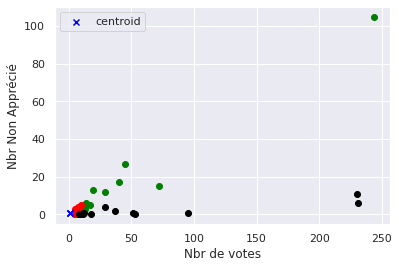

In [83]:
df1 = df_stratified[df_stratified.Cluster_cos==0] #plot des differents clusters
df2 = df_stratified[df_stratified.Cluster_cos==1]
df3 = df_stratified[df_stratified.Cluster_cos==2]

plt.scatter(df1['Nbr_de_votes'],df1['Nbr_Non_Apprécié'],color='green')
plt.scatter(df2['Nbr_de_votes'],df2['Nbr_Non_Apprécié'],color='red')
plt.scatter(df3['Nbr_de_votes'],df3['Nbr_Non_Apprécié'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='blue',marker='x',label='centroid')
plt.xlabel('Nbr de votes')
plt.ylabel('Nbr Non Apprécié')
plt.legend()

In [84]:
df_stratified

,Nbr_Non_Apprécié,Nbr_Neutre,Nbr_Apprécié,Nbr_de_votes,Moyenne,Écart_type,Médiane,Catégorie,Cluster_eu,Cluster_cos
0007270720,0.0,0.0,9.0,9.0,4.444444,0.527046,4.0,Nbr_Apprécié,0,2
0007271166,1.0,3.0,91.0,95.0,4.621053,0.604574,5.0,Nbr_Apprécié,2,2
0007419457,2.0,4.0,31.0,37.0,4.135135,1.004494,4.0,Nbr_Apprécié,2,2
0006550436,11.0,33.0,186.0,230.0,4.186957,0.898715,4.0,Nbr_Apprécié,1,2
0020867506,0.0,0.0,8.0,8.0,4.75,0.46291,5.0,Nbr_Apprécié,0,2
0006128513,1.0,1.0,3.0,5.0,3.6,1.140175,4.0,Nbr_Apprécié,0,1
0006755216,1.0,2.0,9.0,12.0,4.25,1.05529,5.0,Nbr_Apprécié,0,2
0028614496,3.0,1.0,5.0,9.0,3.333333,1.658312,4.0,Nbr_Apprécié,0,1
0007344201,4.0,4.0,21.0,29.0,3.862069,1.27403,4.0,Nbr_Apprécié,0,2
0027136701,0.0,6.0,47.0,53.0,4.584906,0.691541,5.0,Nbr_Apprécié,2,2


In [85]:
from sklearn.decomposition import PCA


In [86]:
scaler = StandardScaler()
df_stratified_std = scaler.fit_transform(df_stratified.T.iloc[0:6].T)

In [87]:
pca=PCA()
pca.fit(df_stratified_std)

PCA()

In [88]:
pca.explained_variance_ratio_ #the ratio explained by each of the 7 features

array([4.97537514e-01, 3.24854660e-01, 1.01226356e-01, 4.75486875e-02,
       2.88327823e-02, 7.07378502e-33])

In [89]:
pca=PCA(n_components=2) # on choisit 2 composantes qui apparaissent le meilleur choix d'apres le graph qui précède

In [90]:
pca.fit(df_stratified_std)

PCA(n_components=2)

In [91]:
pca.transform(df_stratified_std)
scores_pca = pca.transform(df_stratified_std)
scores_pca

array([[-4.22753658e-01, -2.04042293e+00],
       [ 1.66719432e+00, -2.51668235e+00],
       [ 2.50675490e-01, -1.01573680e+00],
       [ 6.07865339e+00, -1.35668837e+00],
       [-3.82136339e-01, -2.42759305e+00],
       [-7.36350183e-01, -2.04716155e-01],
       [-4.13132079e-01, -9.79351634e-01],
       [-7.86029700e-01,  8.81188631e-01],
       [-5.75044278e-03, -2.27830968e-01],
       [ 8.15001562e-01, -2.03603454e+00],
       [-3.41096627e-01, -1.98679584e+00],
       [-4.36237047e-01, -1.36123126e+00],
       [ 7.10454991e-01, -1.52143243e+00],
       [ 4.90897272e+00, -2.94404819e+00],
       [-5.41041507e-01, -6.36872955e-01],
       [-4.37418872e-01, -1.03244278e+00],
       [-1.30153661e-01, -2.35929789e+00],
       [-5.81372790e-01, -1.28350207e+00],
       [-5.68072670e-01, -6.42771749e-01],
       [-8.40099212e-01,  7.32818289e-01],
       [ 2.52249343e+00,  8.67488385e-01],
       [-6.74649338e-01, -2.53258680e-01],
       [-4.93277984e-01,  8.41794150e-01],
       [-6.

In [92]:
# We have chosen 3 clusters, So we run k-means with number of clusters equals three.
# Same initializer and random state as before.
kmeans_pca_eu = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans_pca_eu.fit(scores_pca)

KMeans(n_clusters=3, random_state=42)

In [93]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters.
df_segm_pca_kmeans=pd.concat([df_stratified.reset_index(drop=True),pd.DataFrame(scores_pca)],axis= 1)
df_segm_pca_kmeans.columns.values[-2:]=['Composante 1', 'Composante 2']
# The last column we add contains the pa k-means clustering Labels.
df_segm_pca_kmeans['Segment K-means PCA eu'] = kmeans_pca_eu.labels_

In [94]:
df_segm_pca_kmeans['Segment eu'] = df_segm_pca_kmeans['Segment K-means PCA eu'].map({0:'Cluster 1', 1:'Cluster 2', 2:'Cluster 3'})
df_segm_pca_kmeans

,Nbr_Non_Apprécié,Nbr_Neutre,Nbr_Apprécié,Nbr_de_votes,Moyenne,Écart_type,Médiane,Catégorie,Cluster_eu,Cluster_cos,Composante 1,Composante 2,Segment K-means PCA eu,Segment eu
0,0.0,0.0,9.0,9.0,4.444444,0.527046,4.0,Nbr_Apprécié,0,2,-0.422754,-2.040423,2,Cluster 3
1,1.0,3.0,91.0,95.0,4.621053,0.604574,5.0,Nbr_Apprécié,2,2,1.667194,-2.516682,2,Cluster 3
2,2.0,4.0,31.0,37.0,4.135135,1.004494,4.0,Nbr_Apprécié,2,2,0.250675,-1.015737,2,Cluster 3
3,11.0,33.0,186.0,230.0,4.186957,0.898715,4.0,Nbr_Apprécié,1,2,6.078653,-1.356688,1,Cluster 2
4,0.0,0.0,8.0,8.0,4.75,0.46291,5.0,Nbr_Apprécié,0,2,-0.382136,-2.427593,2,Cluster 3
5,1.0,1.0,3.0,5.0,3.6,1.140175,4.0,Nbr_Apprécié,0,1,-0.736350,-0.204716,2,Cluster 3
6,1.0,2.0,9.0,12.0,4.25,1.05529,5.0,Nbr_Apprécié,0,2,-0.413132,-0.979352,2,Cluster 3
7,3.0,1.0,5.0,9.0,3.333333,1.658312,4.0,Nbr_Apprécié,0,1,-0.786030,0.881189,0,Cluster 1
8,4.0,4.0,21.0,29.0,3.862069,1.27403,4.0,Nbr_Apprécié,0,2,-0.005750,-0.227831,2,Cluster 3
9,0.0,6.0,47.0,53.0,4.584906,0.691541,5.0,Nbr_Apprécié,2,2,0.815002,-2.036035,2,Cluster 3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


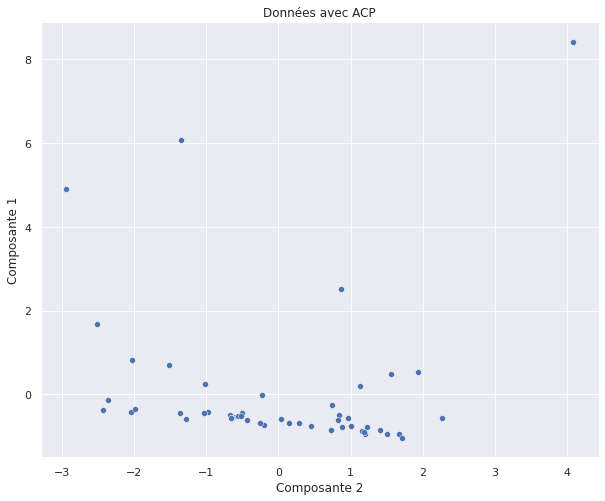

In [95]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
x_axis = df_segm_pca_kmeans['Composante 2']
y_axis = df_segm_pca_kmeans['Composante 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis)
plt.title('Données avec ACP')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


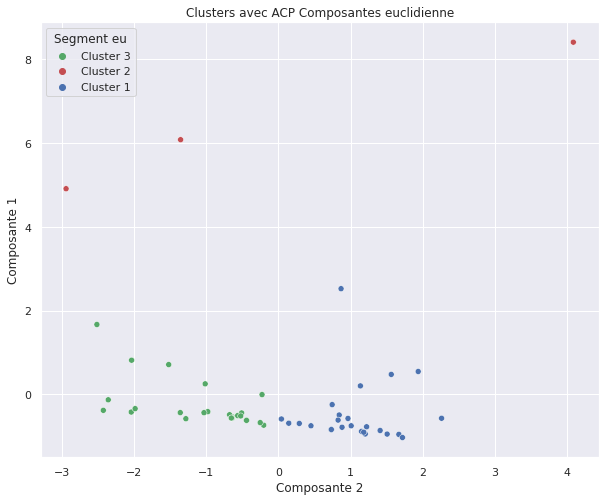

In [96]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment eu'], palette = ['g', 'r', 'b'])
plt.title('Clusters avec ACP Composantes euclidienne')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


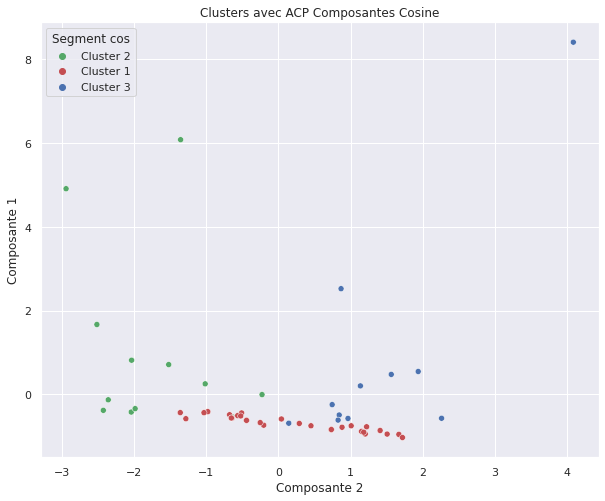

In [97]:
scaler = StandardScaler()
Car_stat_sim = scaler.fit_transform(similarity_matrix)
pca=PCA(n_components=2)
pca.fit(Car_stat_sim)
scores_pca_cos = pca.transform(Car_stat_sim)
scores_pca_cos
# We have chosen 3 clusters, So we run k-means with number of clusters equals three.
# Same initializer and random state as before.
kmeans_pca_cos = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans_pca_cos.fit(scores_pca_cos)
# The last column we add contains the pa k-means clustering Labels.
df_segm_pca_kmeans['Segment K-means PCA cos'] = kmeans_pca_cos.labels_
df_segm_pca_kmeans['Segment cos'] = df_segm_pca_kmeans['Segment K-means PCA cos'].map({0:'Cluster 1', 1:'Cluster 2', 2:'Cluster 3'})
df_segm_pca_kmeans
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
x_axis = df_segm_pca_kmeans['Composante 2']
y_axis = df_segm_pca_kmeans['Composante 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment cos'], palette = ['g', 'r', 'b'])
plt.title('Clusters avec ACP Composantes Cosine')
plt.show()

In [98]:
df_stratified

,Nbr_Non_Apprécié,Nbr_Neutre,Nbr_Apprécié,Nbr_de_votes,Moyenne,Écart_type,Médiane,Catégorie,Cluster_eu,Cluster_cos
0007270720,0.0,0.0,9.0,9.0,4.444444,0.527046,4.0,Nbr_Apprécié,0,2
0007271166,1.0,3.0,91.0,95.0,4.621053,0.604574,5.0,Nbr_Apprécié,2,2
0007419457,2.0,4.0,31.0,37.0,4.135135,1.004494,4.0,Nbr_Apprécié,2,2
0006550436,11.0,33.0,186.0,230.0,4.186957,0.898715,4.0,Nbr_Apprécié,1,2
0020867506,0.0,0.0,8.0,8.0,4.75,0.46291,5.0,Nbr_Apprécié,0,2
0006128513,1.0,1.0,3.0,5.0,3.6,1.140175,4.0,Nbr_Apprécié,0,1
0006755216,1.0,2.0,9.0,12.0,4.25,1.05529,5.0,Nbr_Apprécié,0,2
0028614496,3.0,1.0,5.0,9.0,3.333333,1.658312,4.0,Nbr_Apprécié,0,1
0007344201,4.0,4.0,21.0,29.0,3.862069,1.27403,4.0,Nbr_Apprécié,0,2
0027136701,0.0,6.0,47.0,53.0,4.584906,0.691541,5.0,Nbr_Apprécié,2,2


3/ spectral clustering

In [99]:
from scipy.spatial import distance
from scipy import linalg

           Nbr_Apprécié Nbr_de_votes
0007270720          9.0          9.0
0007271166         91.0         95.0
0007419457         31.0         37.0
0006550436        186.0        230.0
0020867506          8.0          8.0
0006128513          3.0          5.0
0006755216          9.0         12.0
0028614496          5.0          9.0
0007344201         21.0         29.0
0027136701         47.0         53.0
0020311605         10.0         11.0
0007313381          7.0          9.0
0007436629         44.0         51.0
0007171684        219.0        231.0
0006473296          9.0         11.0
0007245815          6.0          9.0
0007150342         17.0         18.0
0025483358          4.0          5.0
0007174268          3.0          6.0
0020826621          2.0          5.0
000752417X         22.0         72.0
0007821859          2.0          5.0
0007300441          5.0         13.0
0006552358          2.0          5.0
0007328230          3.0          7.0
0007461763          3.0          8.0
0

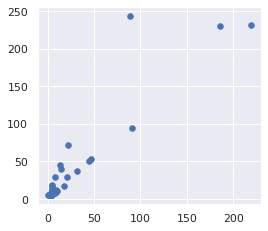

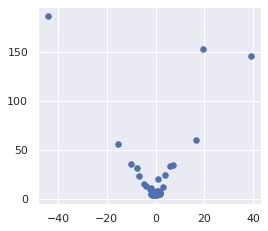

In [100]:
X_st= df_stratified.iloc[:,2:4]
print(X_st) # composée de 2 dimensions et 54 lignes de livres
transformation = [[0.60,-0.23],[-0.40,0.85]]
plt.figure(figsize=(4,8))
plt.subplot(211)
plt.scatter(X_st.T.iloc[0],X_st.T.iloc[1],s=30)
X_aniso=np.dot(X_st,transformation) #distribution anisotropique
print(X_aniso)
plt.figure(figsize=(4,8))
plt.subplot(211)
plt.scatter(X_aniso[:,0],X_aniso[:,1],s=30)

[[ 1.26953347e-01 -7.14160814e-03  1.13858407e-04]
 [ 3.24088697e-02 -1.81724853e-03  2.05689577e-05]
 [ 3.78445617e-02 -2.12889933e-03  3.39394466e-05]
 [ 3.24425024e-02  5.83073318e-01  3.98712273e-01]
 [ 1.33911077e-01 -7.53300690e-03  1.20098465e-04]
 [ 1.63602522e-01 -9.20326349e-03  1.46727314e-04]
 [ 1.22552432e-01 -6.89403992e-03  1.09911432e-04]
 [ 1.52811905e-01 -8.59625028e-03  1.37049720e-04]
 [ 4.80462554e-02 -2.70278420e-03  4.30900837e-05]
 [ 4.06297826e-02 -2.28557411e-03  3.64308961e-05]
 [ 1.17827807e-01 -6.62826184e-03  1.05674141e-04]
 [ 1.41207497e-01 -7.94345821e-03  1.26642277e-04]
 [ 4.10032297e-02 -2.30658211e-03  3.67660975e-05]
 [ 3.24425022e-02  5.83073374e-01  3.98715985e-01]
 [ 1.25360187e-01 -7.05198682e-03  1.12429575e-04]
 [ 1.47438348e-01 -8.29396730e-03  1.32230432e-04]
 [ 6.58521272e-02 -3.70443232e-03  5.90595740e-05]
 [ 1.57625935e-01 -8.86705774e-03  1.41367197e-04]
 [ 1.68086483e-01 -9.45550334e-03  1.50748765e-04]
 [ 1.65585832e-01 -9.31483220e-

Text(0.5, 1.0, 'Labels returned by Spectral clustering avec métrique euclidienne')

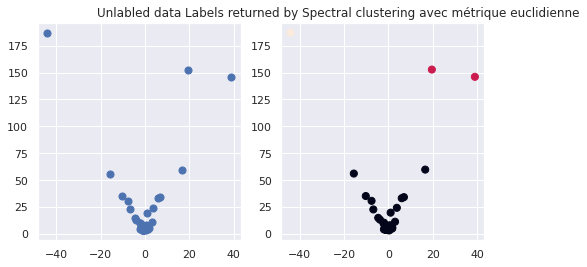

In [101]:
rbf_param =7.6 #hyperparametre pour accélerer la convergence de 2 point
#trouver M
from scipy.spatial import distance
K =np.exp(-rbf_param*distance.cdist(X_st,X_st,metric='seuclidean')) #similarity between each 2 nodes
K
D=K.sum(axis=1) #faire la somme des lignes pour avoir des di
D #matrice ligne avec 955 val
D=np.sqrt(1/D)
M=np.multiply(D[np.newaxis,:],np.multiply(K,D[:,np.newaxis]))
M
from sklearn.preprocessing import normalize 
#step2 
P,D,Pt=linalg.svd(M, full_matrices=True, lapack_driver='gesvd')
Psubset_st = P[:,0:3] #nbr of eigenvectors = nbr of clusters
print(Psubset_st)

#print(D) #singular values in decreasing order
Y_pred_sc=KMeans(n_clusters=3).fit_predict(normalize(Psubset_st))
print(Y_pred_sc)
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(X_aniso[:,0],X_aniso[:,1],s=50)
plt.title('Unlabled data')
plt.subplot(122)
plt.scatter(X_aniso[:,0],X_aniso[:,1],c=Y_pred_sc,s=50)
plt.title('Labels returned by Spectral clustering avec métrique euclidienne')

In [103]:
df_stratified['segemtation SC eu']=Y_pred_sc
df_stratified

,Nbr_Non_Apprécié,Nbr_Neutre,Nbr_Apprécié,Nbr_de_votes,Moyenne,Écart_type,Médiane,Catégorie,Cluster_eu,Cluster_cos,segemtation SC eu
0007270720,0.0,0.0,9.0,9.0,4.444444,0.527046,4.0,Nbr_Apprécié,0,2,0
0007271166,1.0,3.0,91.0,95.0,4.621053,0.604574,5.0,Nbr_Apprécié,2,2,0
0007419457,2.0,4.0,31.0,37.0,4.135135,1.004494,4.0,Nbr_Apprécié,2,2,0
0006550436,11.0,33.0,186.0,230.0,4.186957,0.898715,4.0,Nbr_Apprécié,1,2,1
0020867506,0.0,0.0,8.0,8.0,4.75,0.46291,5.0,Nbr_Apprécié,0,2,0
0006128513,1.0,1.0,3.0,5.0,3.6,1.140175,4.0,Nbr_Apprécié,0,1,0
0006755216,1.0,2.0,9.0,12.0,4.25,1.05529,5.0,Nbr_Apprécié,0,2,0
0028614496,3.0,1.0,5.0,9.0,3.333333,1.658312,4.0,Nbr_Apprécié,0,1,0
0007344201,4.0,4.0,21.0,29.0,3.862069,1.27403,4.0,Nbr_Apprécié,0,2,0
0027136701,0.0,6.0,47.0,53.0,4.584906,0.691541,5.0,Nbr_Apprécié,2,2,0


[[-0.1209219  -0.24854495  0.17150411]
 [-0.12337337 -0.23620136  0.13902222]
 [-0.13020293 -0.1924601   0.04297341]
 [-0.13177741 -0.17981891  0.01987155]
 [-0.1209219  -0.24854495  0.17150411]
 [-0.14067065 -0.06655069 -0.10912782]
 [-0.13477326 -0.15189756 -0.02466533]
 [-0.14169451 -0.03811269 -0.1199294 ]
 [-0.13599757 -0.13856359 -0.04292639]
 [-0.12746758 -0.21188667  0.08233992]
 [-0.12619459 -0.21999855  0.10027142]
 [-0.13338893 -0.16552021 -0.00402192]
 [-0.12882317 -0.20262486  0.06296469]
 [-0.12394502 -0.23310112  0.13128537]
 [-0.13127023 -0.18402277  0.02734349]
 [-0.13844321 -0.10677668 -0.07887858]
 [-0.12415428 -0.23194395  0.12843822]
 [-0.13223736 -0.17588977  0.01307371]
 [-0.1423417  -0.00134274 -0.11997939]
 [-0.14136185  0.0655686  -0.07347496]
 [-0.1374489   0.12483685  0.0341344 ]
 [-0.14136185  0.0655686  -0.07347496]
 [-0.14093356  0.07563847 -0.0603143 ]
 [-0.14136185  0.0655686  -0.07347496]
 [-0.14195219  0.04661204 -0.09350832]
 [-0.14062558  0.08186885

Text(0.5, 1.0, 'Labels returned by Spectral clustering avec métrique cosine')

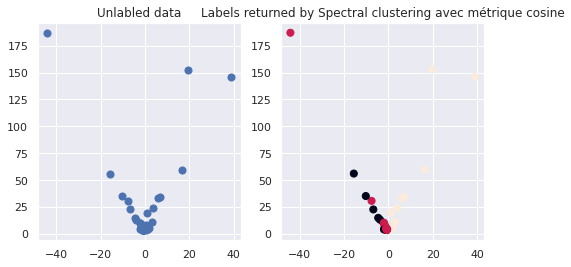

In [104]:
#avec la distance cosine
Kc =np.exp(-rbf_param*distance.cdist(X_st,X_st,metric='cosine')) #similarity between each 2 nodes
Kc
Dc=Kc.sum(axis=1) #faire la somme des lignes pour avoir des di
Dc #matrice ligne avec 955 val
Dc=np.sqrt(1/Dc)
Mc=np.multiply(Dc[np.newaxis,:],np.multiply(Kc,Dc[:,np.newaxis]))
Mc

#step2 
Pc,Dc,Pct=linalg.svd(Mc, full_matrices=True, lapack_driver='gesvd')
Pcsubset = Pc[:,0:3] #nbr of eigenvectors = nbr of clusters
print(Pcsubset)

#print(D) #singular values in decreasing order
y_pred_scc=KMeans(n_clusters=3).fit_predict(normalize(Pcsubset))
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(X_aniso[:,0],X_aniso[:,1],s=50)
plt.title('Unlabled data')
plt.subplot(122)
plt.scatter(X_aniso[:,0],X_aniso[:,1],c=y_pred_scc,s=50)
plt.title('Labels returned by Spectral clustering avec métrique cosine')

In [105]:
df_stratified['segemtation SC cos']=y_pred_scc
df_stratified

,Nbr_Non_Apprécié,Nbr_Neutre,Nbr_Apprécié,Nbr_de_votes,Moyenne,Écart_type,Médiane,Catégorie,Cluster_eu,Cluster_cos,segemtation SC eu,segemtation SC cos
0007270720,0.0,0.0,9.0,9.0,4.444444,0.527046,4.0,Nbr_Apprécié,0,2,0,2
0007271166,1.0,3.0,91.0,95.0,4.621053,0.604574,5.0,Nbr_Apprécié,2,2,0,2
0007419457,2.0,4.0,31.0,37.0,4.135135,1.004494,4.0,Nbr_Apprécié,2,2,0,2
0006550436,11.0,33.0,186.0,230.0,4.186957,0.898715,4.0,Nbr_Apprécié,1,2,1,2
0020867506,0.0,0.0,8.0,8.0,4.75,0.46291,5.0,Nbr_Apprécié,0,2,0,2
0006128513,1.0,1.0,3.0,5.0,3.6,1.140175,4.0,Nbr_Apprécié,0,1,0,1
0006755216,1.0,2.0,9.0,12.0,4.25,1.05529,5.0,Nbr_Apprécié,0,2,0,2
0028614496,3.0,1.0,5.0,9.0,3.333333,1.658312,4.0,Nbr_Apprécié,0,1,0,1
0007344201,4.0,4.0,21.0,29.0,3.862069,1.27403,4.0,Nbr_Apprécié,0,2,0,2
0027136701,0.0,6.0,47.0,53.0,4.584906,0.691541,5.0,Nbr_Apprécié,2,2,0,2


In [107]:
#Identification des livres les mieux appréciés dans notre nouvelle entrée en données : Apprécié - Plus au moins Apprécié - Non apprécié (Classe réelle)
D= pd.DataFrame(df_stratified.T.iloc[4])
D=D.T
for j in D.columns:
    if D.iloc[0][j]>3.5:
            D.loc[-1,j]=2
    elif D.iloc[0][j]<2.5:
            D.loc[-1,j]=0  
    else:
            D.loc[-1,j]=1   
D.rename(index = {-1: 'Classe'},inplace = True)
D=D.transpose()
D

,Moyenne,Classe
0007270720,4.444444,2
0007271166,4.621053,2
0007419457,4.135135,2
0006550436,4.186957,2
0020867506,4.75,2
0006128513,3.6,2
0006755216,4.25,2
0028614496,3.333333,1
0007344201,3.862069,2
0027136701,4.584906,2


In [108]:
T_st=pd.DataFrame(D.iloc[:,1])#les vrais clusters
T_st

,Classe
0007270720,2
0007271166,2
0007419457,2
0006550436,2
0020867506,2
0006128513,2
0006755216,2
0028614496,1
0007344201,2
0027136701,2


In [109]:
#silouhette et info mutuelle pour Kmeans sans pca
#silouhette
from sklearn.metrics import silhouette_score
#KMEANS,euc
silouette_km_euc = silhouette_score(df_stratified[['Nbr_de_votes','Moyenne']],df_stratified['Cluster_eu'], metric='euclidean')
print('Score Silhouette pour KMeans avec distance euclidienne : %.3f' % silouette_km_euc)
#KMEANS,cos
silouette_km_cos= silhouette_score(similarity_matrix, df_stratified['Cluster_cos'], metric='cosine')
print('Score Silhouette pour KMeans avec similarité cosinus : %.3f' % silouette_km_cos)
#info mutuelle
import sklearn
#kmeans,euc
labels_true=T_st['Classe']
InfoMut_km_euc=sklearn.metrics.normalized_mutual_info_score(labels_true, df_stratified['Cluster_eu'],average_method='arithmetic')
print('Score Info Mutuelle pour KMeans avec distance euclidienne : %.3f' % InfoMut_km_euc)
#kmeans,cos
InfoMut_km_cos=sklearn.metrics.normalized_mutual_info_score(labels_true, df_stratified['Cluster_cos'],average_method='arithmetic')
print('Score Info Mutuelle pour KMeans avec similarité cosinus : %.3f' % InfoMut_km_cos)

Score Silhouette pour KMeans avec distance euclidienne : 0.821
Score Silhouette pour KMeans avec similarité cosinus : 0.673
Score Info Mutuelle pour KMeans avec distance euclidienne : 0.018
Score Info Mutuelle pour KMeans avec similarité cosinus : 0.338


In [110]:
#silouhette et info mutuelle pour spectral clustering
#silouhette
from sklearn.metrics import silhouette_score
#KMEANS,euc
silouette_km_eucc = silhouette_score(Car_statF[['Nbr_de_votes','Moyenne']],y_pred_sc, metric='euclidean')
print('Score Silhouette pour KMeans avec distance euclidienne : %.3f' % silouette_km_eucc)
#KMEANS,cos
silouette_km_cosc= silhouette_score(similarity_matrix,y_pred_scc, metric='cosine')
print('Score Silhouette pour KMeans avec similarité cosinus : %.3f' % silouette_km_cosc)
#info mutuelle
import sklearn
#kmeans,euc
labels_true=T_st['Classe']
InfoMut_km_eucc=sklearn.metrics.normalized_mutual_info_score(labels_true,df_stratified['segemtation SC eu'],average_method='arithmetic')
print('Score Info Mutuelle pour KMeans avec distance euclidienne : %.3f' % InfoMut_km_eucc)
#kmeans,cos
InfoMut_km_cosc=sklearn.metrics.normalized_mutual_info_score(labels_true,df_stratified['segemtation SC cos'],average_method='arithmetic')
print('Score Info Mutuelle pour KMeans avec similarité cosinus : %.3f' % InfoMut_km_cosc)

Score Silhouette pour KMeans avec distance euclidienne : 0.563
Score Silhouette pour KMeans avec similarité cosinus : 0.375
Score Info Mutuelle pour KMeans avec distance euclidienne : 0.076
Score Info Mutuelle pour KMeans avec similarité cosinus : 0.431


In [111]:
Result=pd.DataFrame(data=None, index=['KMeans','Spectrale'], columns=['distance euclidienne silhouette','distance euclidienne info. mut','similarité cosinus silhouette','similarité cosinus info. mut'])
Result.iloc[0][0]=silouette_km_euc
Result.iloc[0][1]=InfoMut_km_euc
Result.iloc[0][2]=silouette_km_cos
Result.iloc[0][3]=InfoMut_km_cos
Result.iloc[1][0]=silouette_km_eucc
Result.iloc[1][1]=InfoMut_km_eucc
Result.iloc[1][2]=silouette_km_cosc
Result.iloc[1][3]=InfoMut_km_cosc
Result

,distance euclidienne silhouette,distance euclidienne info. mut,similarité cosinus silhouette,similarité cosinus info. mut
KMeans,0.82142,0.018476,0.673058,0.337569
Spectrale,0.562769,0.075953,0.374745,0.430511



# **|Fin|**

